# Plots of oscilloscope records

In [3]:
import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob

## Read waveforms from the file

XINC: 2.5e-08    YINC: 0.0015625    FRAMES: 1999    TRIG: 0.00516    YORIGIN: -119.0
1 , -0.0125 , 0.043750000000000004 , 8.9343749999999
2 , -0.0125 , 0.043750000000000004 , 8.9343749999999
3 , 0.0015625 , 0.08750000000000001 , 65.96718749999962
4 , 0.0015625 , 0.08750000000000001 , 65.96718749999962
5 , -0.0140625 , 0.0421875 , 3.515625000000101
6 , -0.0140625 , 0.0421875 , 3.515625000000101
7 , -0.0140625 , 0.0421875 , 3.515625000000101
8 , -0.0140625 , 0.0421875 , 3.515625000000101
9 , 0.0 , 0.1546875 , 66.91562499999964
10 , 0.0 , 0.1546875 , 66.91562499999964
11 , -0.0140625 , 0.0671875 , 45.03437500000002
12 , -0.0140625 , 0.0671875 , 45.03437500000002
13 , -0.0140625 , 0.0671875 , 45.03437500000002
14 , -0.0140625 , 0.07968750000000001 , 48.793749999999896
15 , 0.0 , 0.09843750000000001 , 59.08437499999972
16 , 0.0 , 0.09843750000000001 , 59.08437499999972
17 , 0.0 , 0.09843750000000001 , 59.08437499999972
18 , 0.0 , 0.07968750000000001 , 63.86562499999999
19 , 0.0 , 0.07968750

Text(0,0.5,'Amplitude [V]')

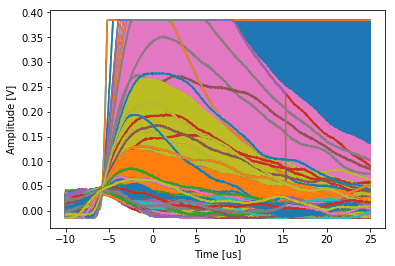

In [25]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np

for f in glob.iglob("./data/data1_*-CHAN1.h5"): # generator, search immediate subdirectories 
    print '  ', f
    break

#with h5py.File('./data/data11.h5','r') as hf:
with h5py.File(f,'r') as hf:
    #print('List of arrays in this file: \n', hf.keys())
    print 'XINC:', np.array(hf.get('XINC')), '   YINC:', np.array(hf.get('YINC')), '   FRAMES:', np.array(hf.get('FRAMES')), '   TRIG:', np.array(hf.get('TRIG')), '   YORIGIN:', np.array(hf.get('YORIGIN'))
    frames = np.array(hf.get('FRAMES'))
    for n in range(1,frames+1):
        data = hf.get(str(n))
        np_data = 1.0 * np.array(data)
        #print 'np_data:', max(np_data)
        np_data = np_data - 128 - np.array(hf.get('YORIGIN'))
        np_data = np.array(hf.get('YINC')) * np_data    # to Volts
        np_time = range(0,1400)
        np_time *= np.array(hf.get('XINC'))
        np_time *= 1e6   # to microseconds
        np_time -= 10    # trigger time offset
        
        #print np_data
        maximum = 0
        minimum = 255
        suma = 0
        for i in range(1400):
            if np_data[i] > maximum:
                maximum = np_data[i]
            if np_data[i] < minimum:
                minimum = np_data[i]
            suma = suma + np_data[i]
            
        
        if n<30:
            print n,',', minimum,',', maximum,',', suma
        
        #if (np_data[170]-minimum < 0.001):
        #    plt.plot(np_time, np_data-minimum) 
        #plt.plot(np_time, np_data-np_data[0]) 
        plt.plot(np_time, np_data) 
        
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [V]')


## Parse all data files in current directory
Read in all the data files in current directory and process them into a histogram.

   ./data/241-Am/data01_Am.h5 CAPTURING: 534.04
   ./data/241-Am/data02_Am.h5 CAPTURING: 541.98


<Figure size 1440x720 with 0 Axes>

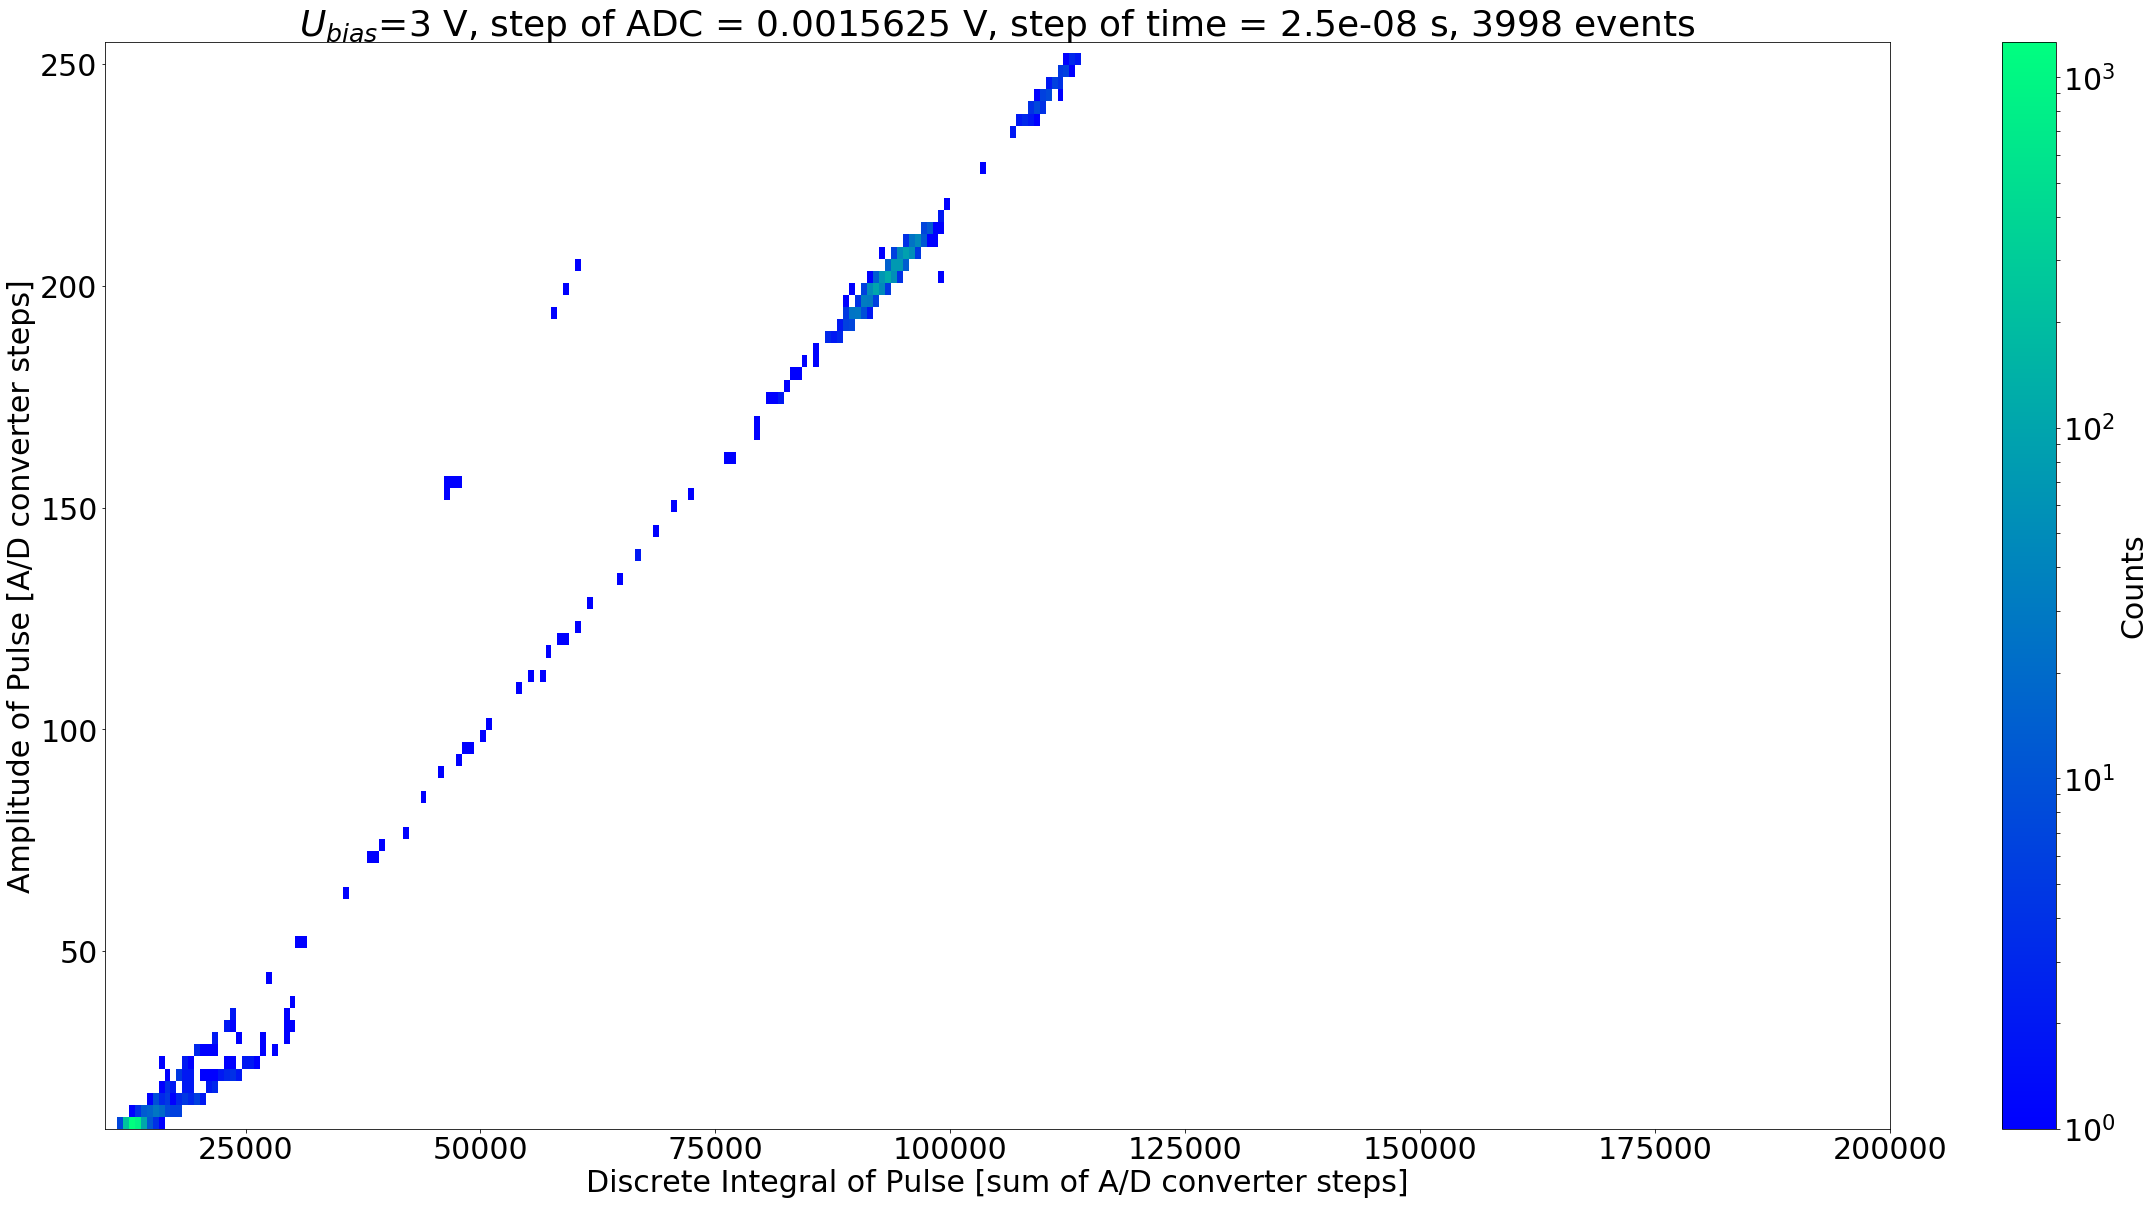

In [77]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for d in ['241-Am']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 200000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.winter)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')
plt.title(r'$U_{bias}$=3 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')

   ./data/241-Am/data01_Am.h5 CAPTURING: 534.04
   ./data/241-Am/data02_Am.h5 CAPTURING: 541.98


<Figure size 1440x720 with 0 Axes>

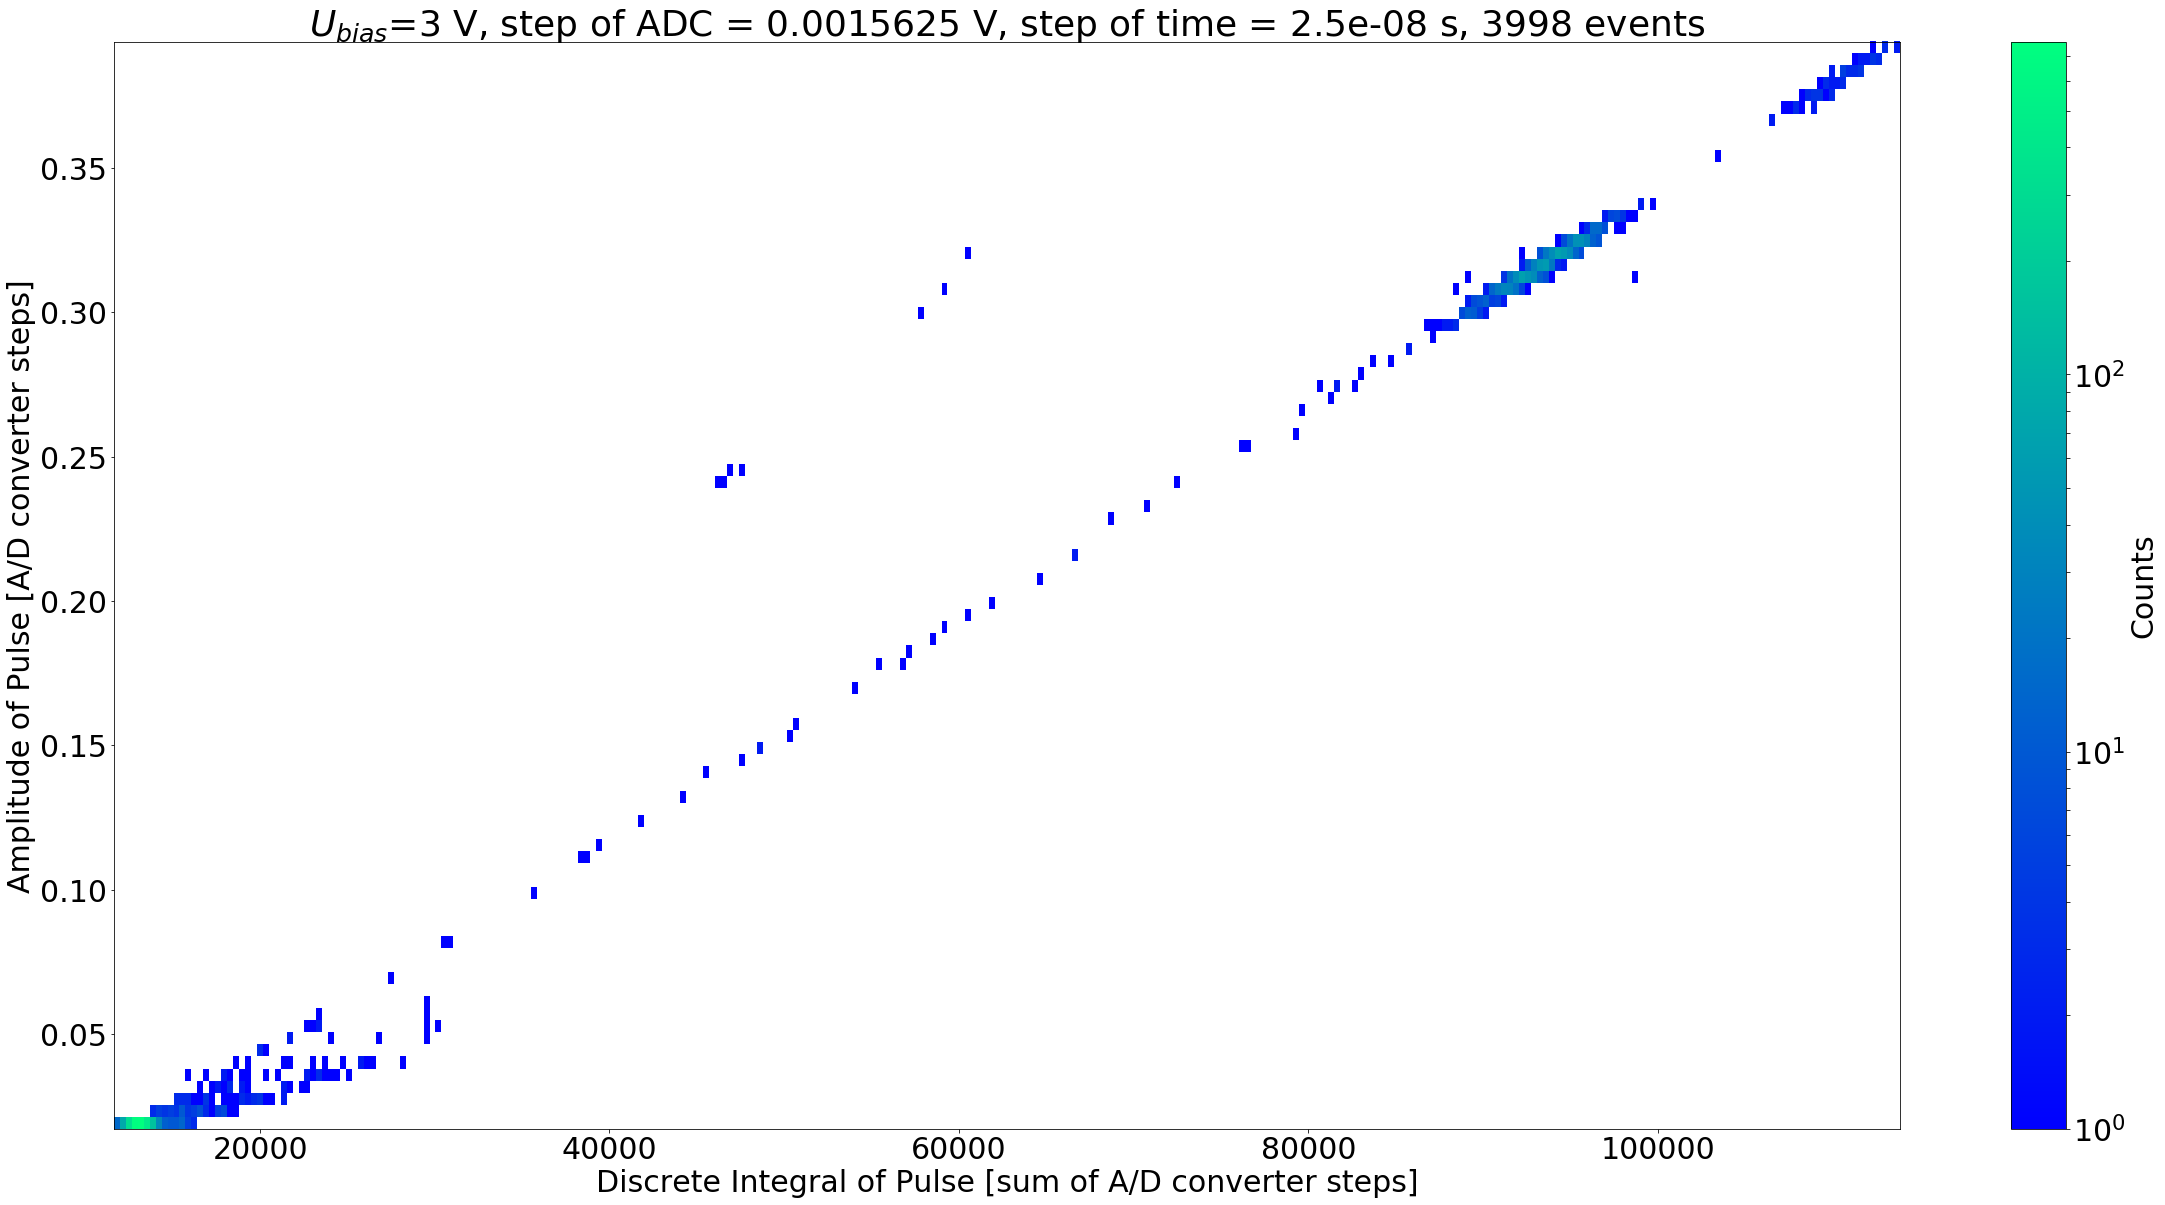

In [82]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum*0.0015625)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for d in ['241-Am']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

ble = plt.hist2d(y, x, bins=(300,90), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.winter)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')
plt.title(r'$U_{bias}$=3 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')

   ./data/cerf2017/data2.h5 CAPTURING: None


Text(0.5,1,'$U_{bias}$=3 V, step of ADC = 0.002 V, step of time = 2e-08 s, 2032 events')

<Figure size 1440x720 with 0 Axes>

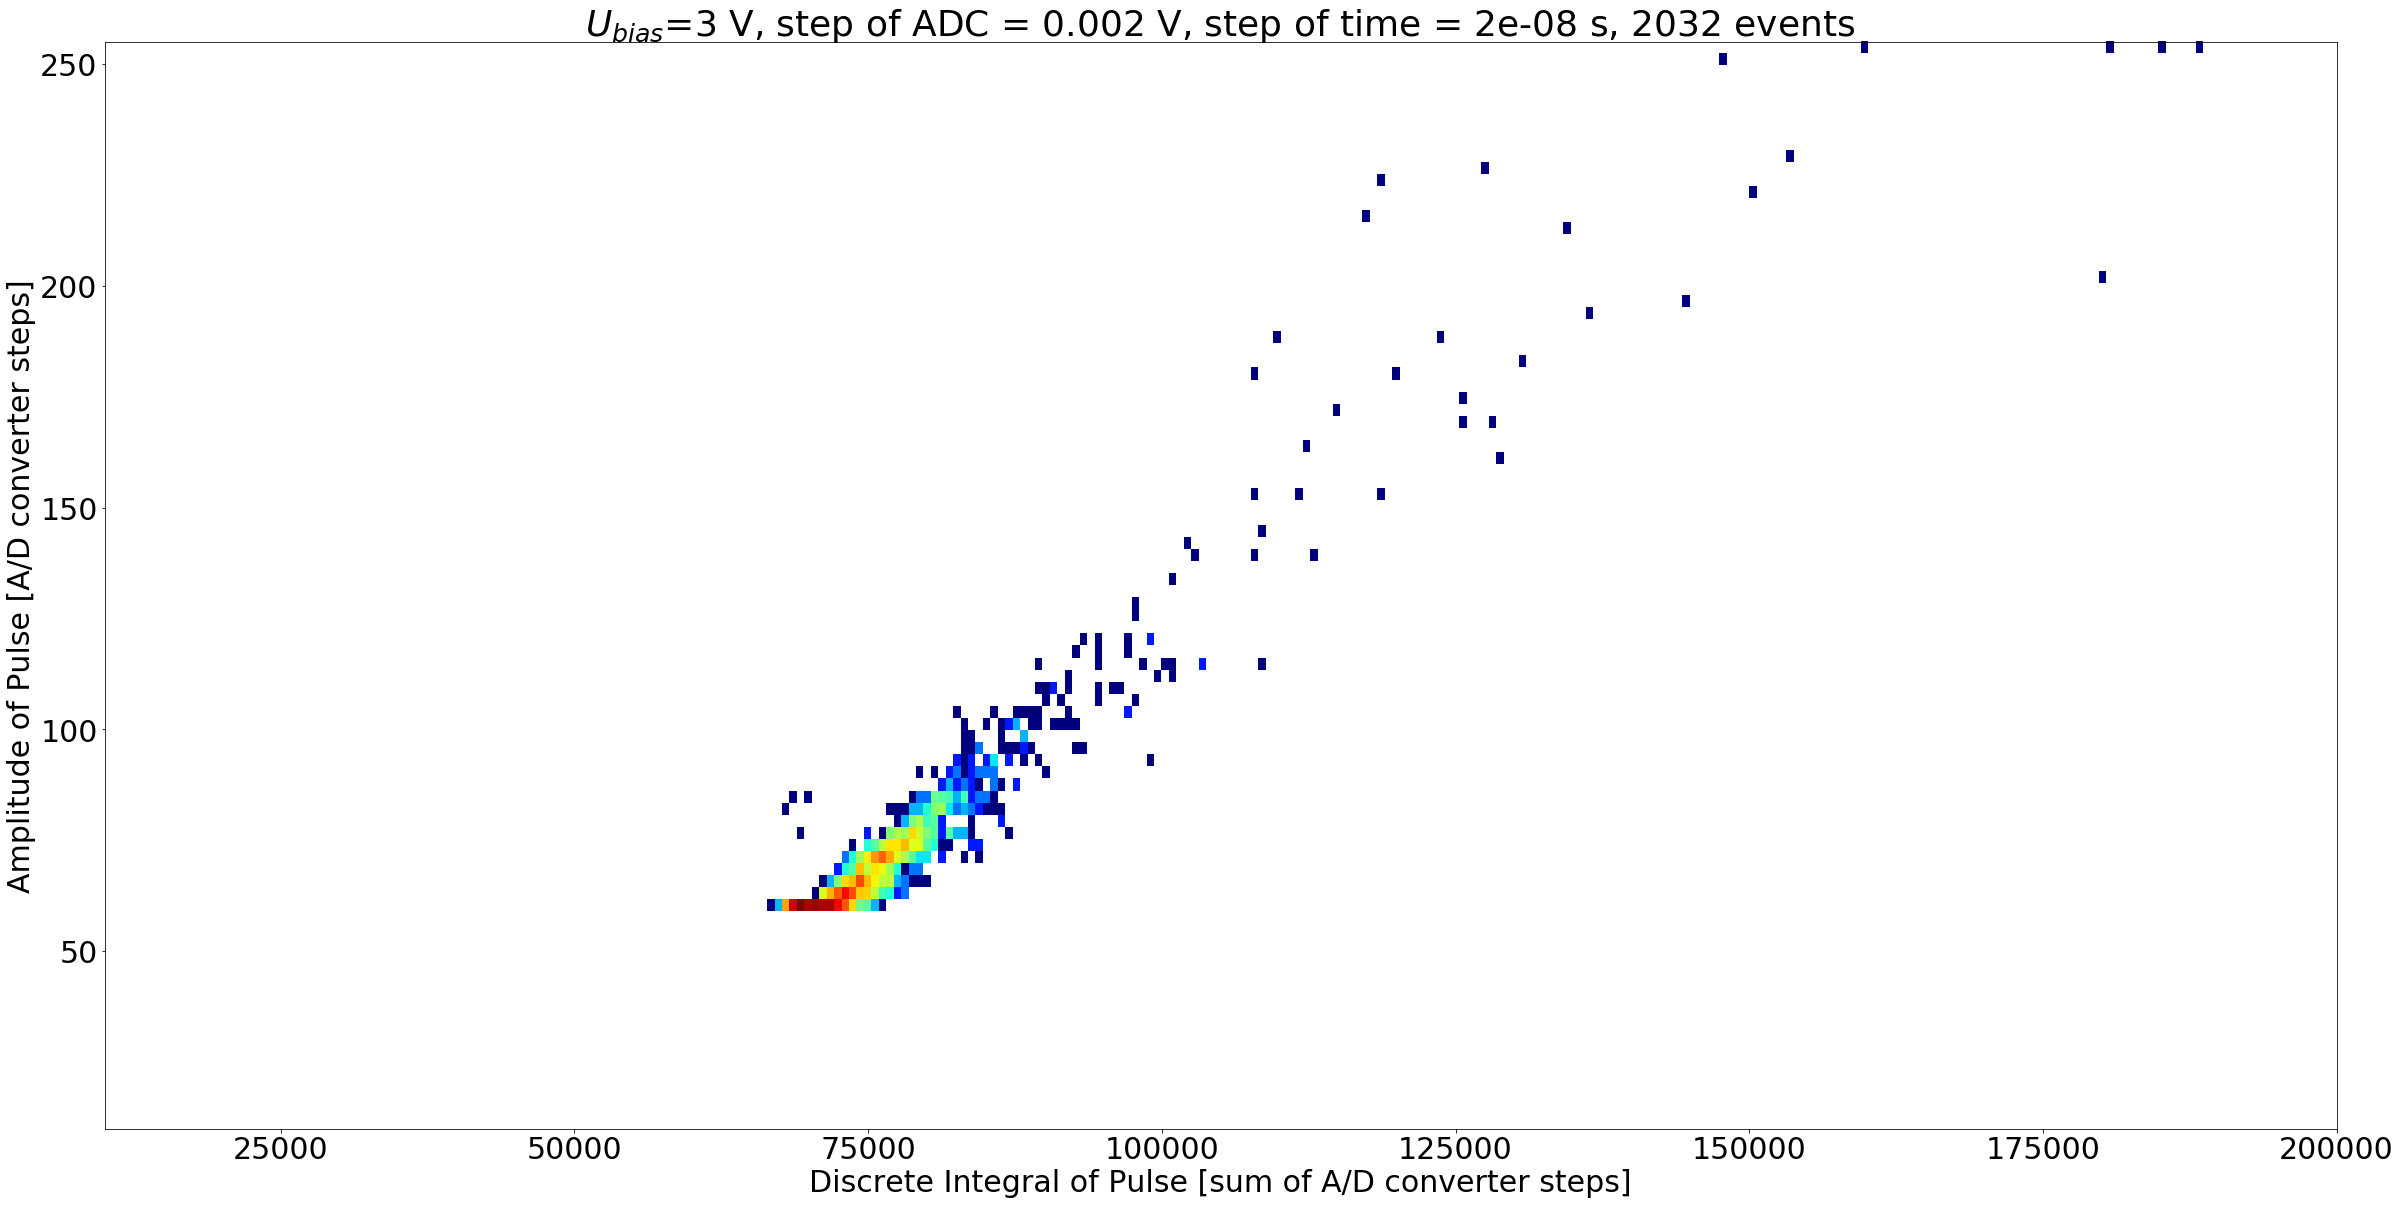

In [37]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for d in ['cerf2017']:
    for f in glob.iglob('./data/'+ d + '/*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 200000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [V]')
plt.title(r'$U_{bias}$=3 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
#cb = plt.colorbar()
#cb.set_label('Counts')

   ./data/cerf2018/data45_1528510341-CHAN1.h5 CAPTURING: 476.03
   ./data/cerf2018/data52_1528511883-CHAN1.h5 CAPTURING: 114.75
   ./data/cerf2018/data178_1528540597-CHAN1.h5 CAPTURING: 513.36
   ./data/cerf2018/data90_1528521472-CHAN1.h5 CAPTURING: 101.52
   ./data/cerf2018/data88_1528520807-CHAN1.h5 CAPTURING: 228.8
   ./data/cerf2018/data08_1528501816-CHAN1.h5 CAPTURING: 102.65
   ./data/cerf2018/data171_1528537873-CHAN1.h5 CAPTURING: 247.74
   ./data/cerf2018/data170_1528537730-CHAN1.h5 CAPTURING: 86.16
   ./data/cerf2018/data48_1528511233-CHAN1.h5 CAPTURING: 103.03
   ./data/cerf2018/data07_1528501644-CHAN1.h5 CAPTURING: 115.6
   ./data/cerf2018/data127_1528528860-CHAN1.h5 CAPTURING: 187.68
   ./data/cerf2018/data34_1528508525-CHAN1.h5 CAPTURING: 103.27
   ./data/cerf2018/data197_1528549465-CHAN1.h5 CAPTURING: 123.86
   ./data/cerf2018/data131_1528529908-CHAN1.h5 CAPTURING: 217.47
   ./data/cerf2018/data91_1528521630-CHAN1.h5 CAPTURING: 102.21
   ./data/cerf2018/data00_1528497279-

   ./data/cerf2018/data103_1528523543-CHAN1.h5 CAPTURING: 102.46
   ./data/cerf2018/data151_1528534709-CHAN1.h5 CAPTURING: 84.94
   ./data/cerf2018/data97_1528522581-CHAN1.h5 CAPTURING: 101.5
   ./data/cerf2018/data182_1528542838-CHAN1.h5 CAPTURING: 314.88
   ./data/cerf2018/data77_1528518661-CHAN1.h5 CAPTURING: 464.36
   ./data/cerf2018/data130_1528529650-CHAN1.h5 CAPTURING: 201.75
   ./data/cerf2018/data135_1528531348-CHAN1.h5 CAPTURING: 205.12
   ./data/cerf2018/data50_1528511551-CHAN1.h5 CAPTURING: 114.09
   ./data/cerf2018/data173_1528538361-CHAN1.h5 CAPTURING: 255.2
   ./data/cerf2018/data20_1528505111-CHAN1.h5 CAPTURING: 118.14
   ./data/cerf2018/data01_1528499136-CHAN1.h5 CAPTURING: 677.34
   ./data/cerf2018/data42_1528509851-CHAN1.h5 CAPTURING: 115.7
   ./data/cerf2018/data154_1528535122-CHAN1.h5 CAPTURING: 74.72
   ./data/cerf2018/data66_1528515813-CHAN1.h5 CAPTURING: 113.71
   ./data/cerf2018/data95_1528522264-CHAN1.h5 CAPTURING: 100.68
   ./data/cerf2018/data65_1528515655-C

<Figure size 1440x720 with 0 Axes>

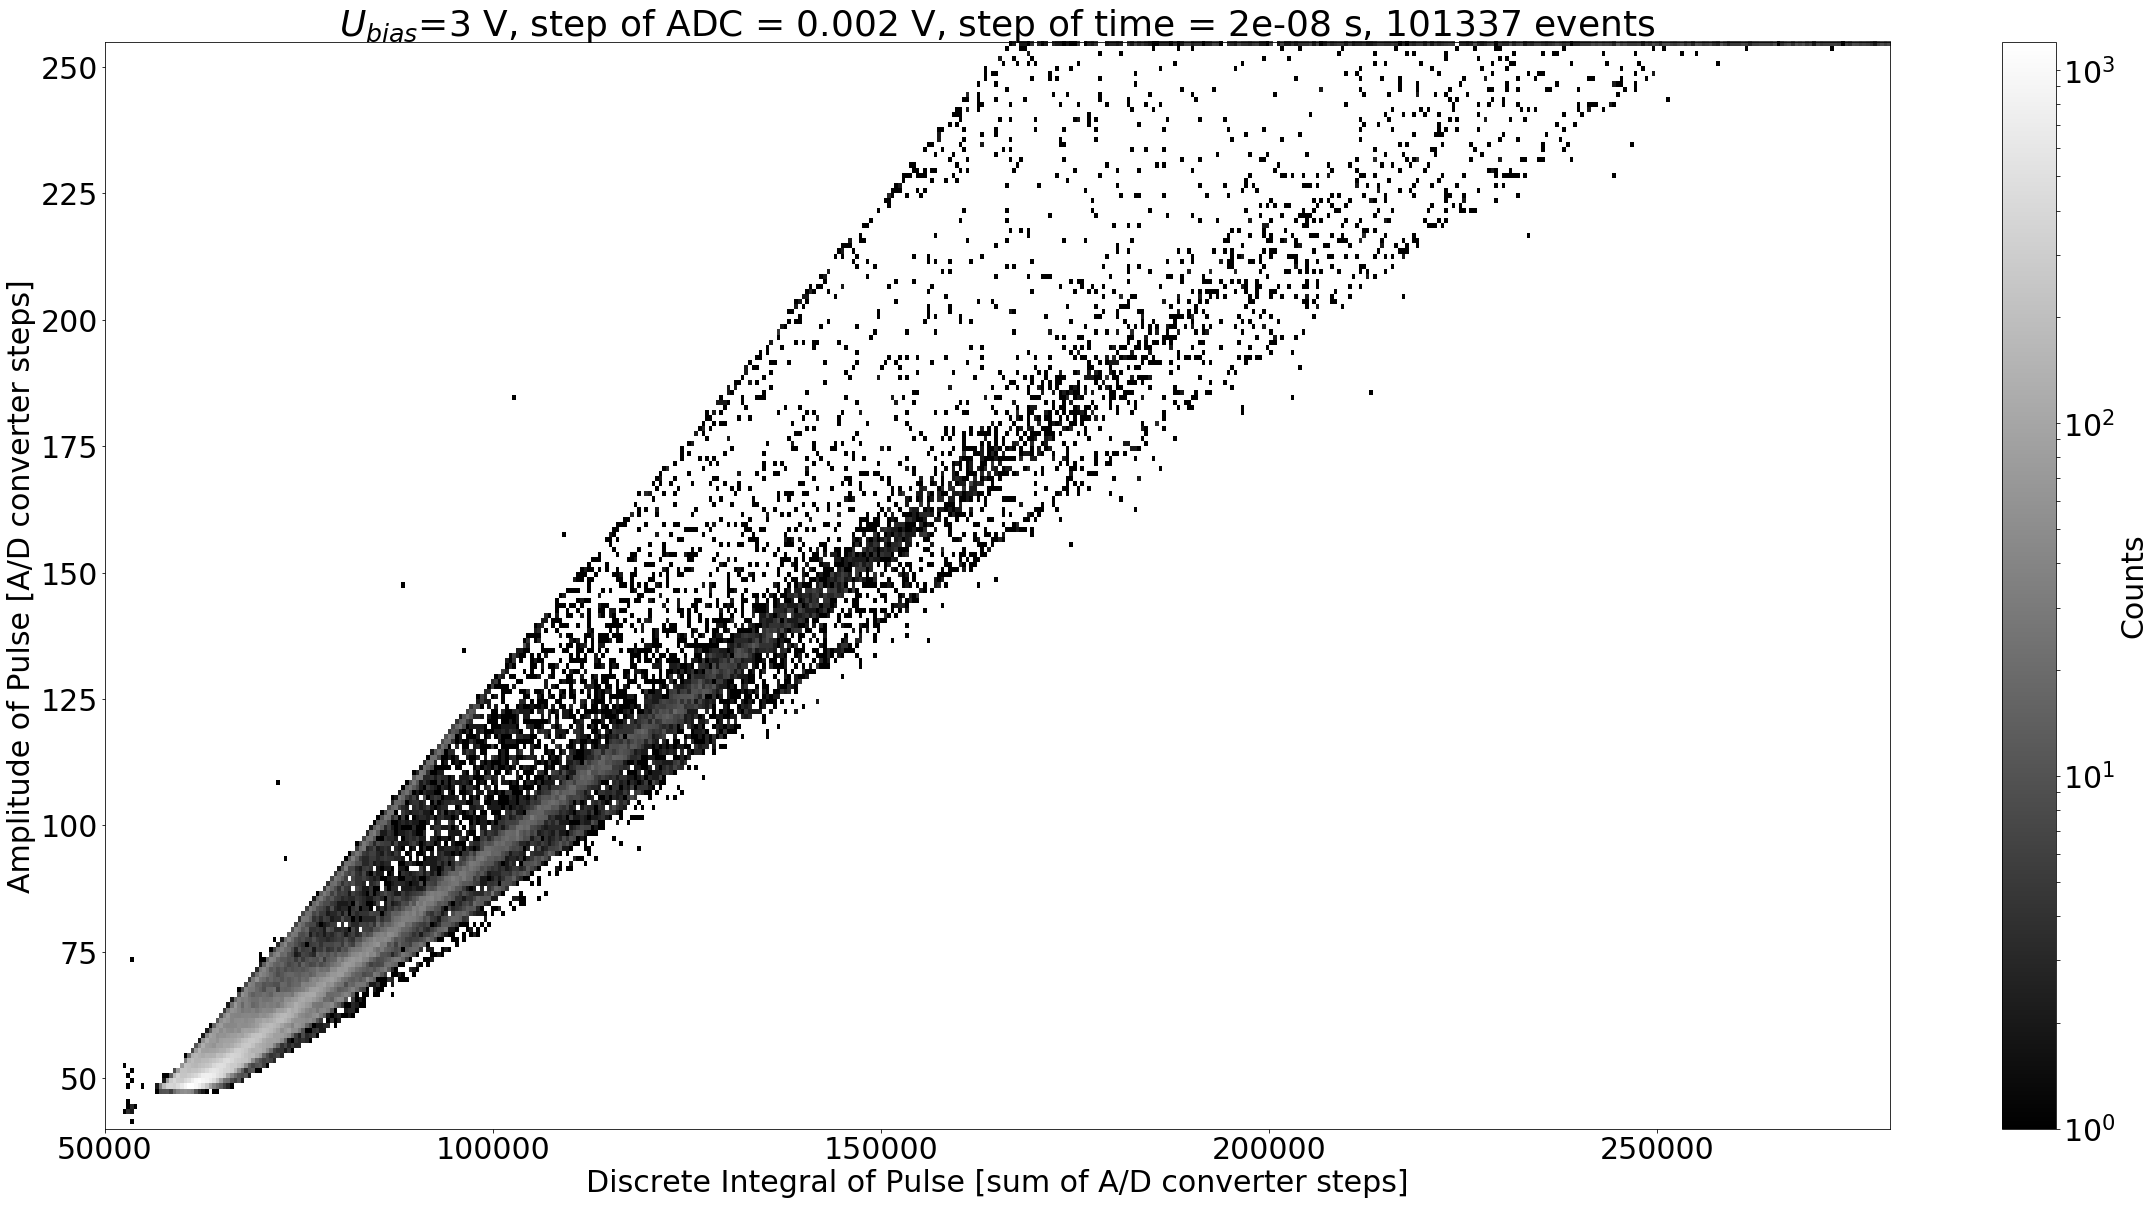

In [105]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for d in ['cerf2018']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

ble = plt.hist2d(y, x, bins=(500,215), range= [[50000, 280000], [40,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray)
#ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 220000], [25,270]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')
plt.title(r'$U_{bias}$=3 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')

   ./data/HIMAC1/data02.h5 CAPTURING: None
   ./data/HIMAC1/data01.h5 CAPTURING: None
   ./data/HIMAC1/data03.h5 CAPTURING: None
   ./data/HIMAC2/data02.h5 CAPTURING: None
   ./data/HIMAC2/data01.h5 CAPTURING: None
   ./data/HIMAC2/data03.h5 CAPTURING: None


<Figure size 1440x720 with 0 Axes>

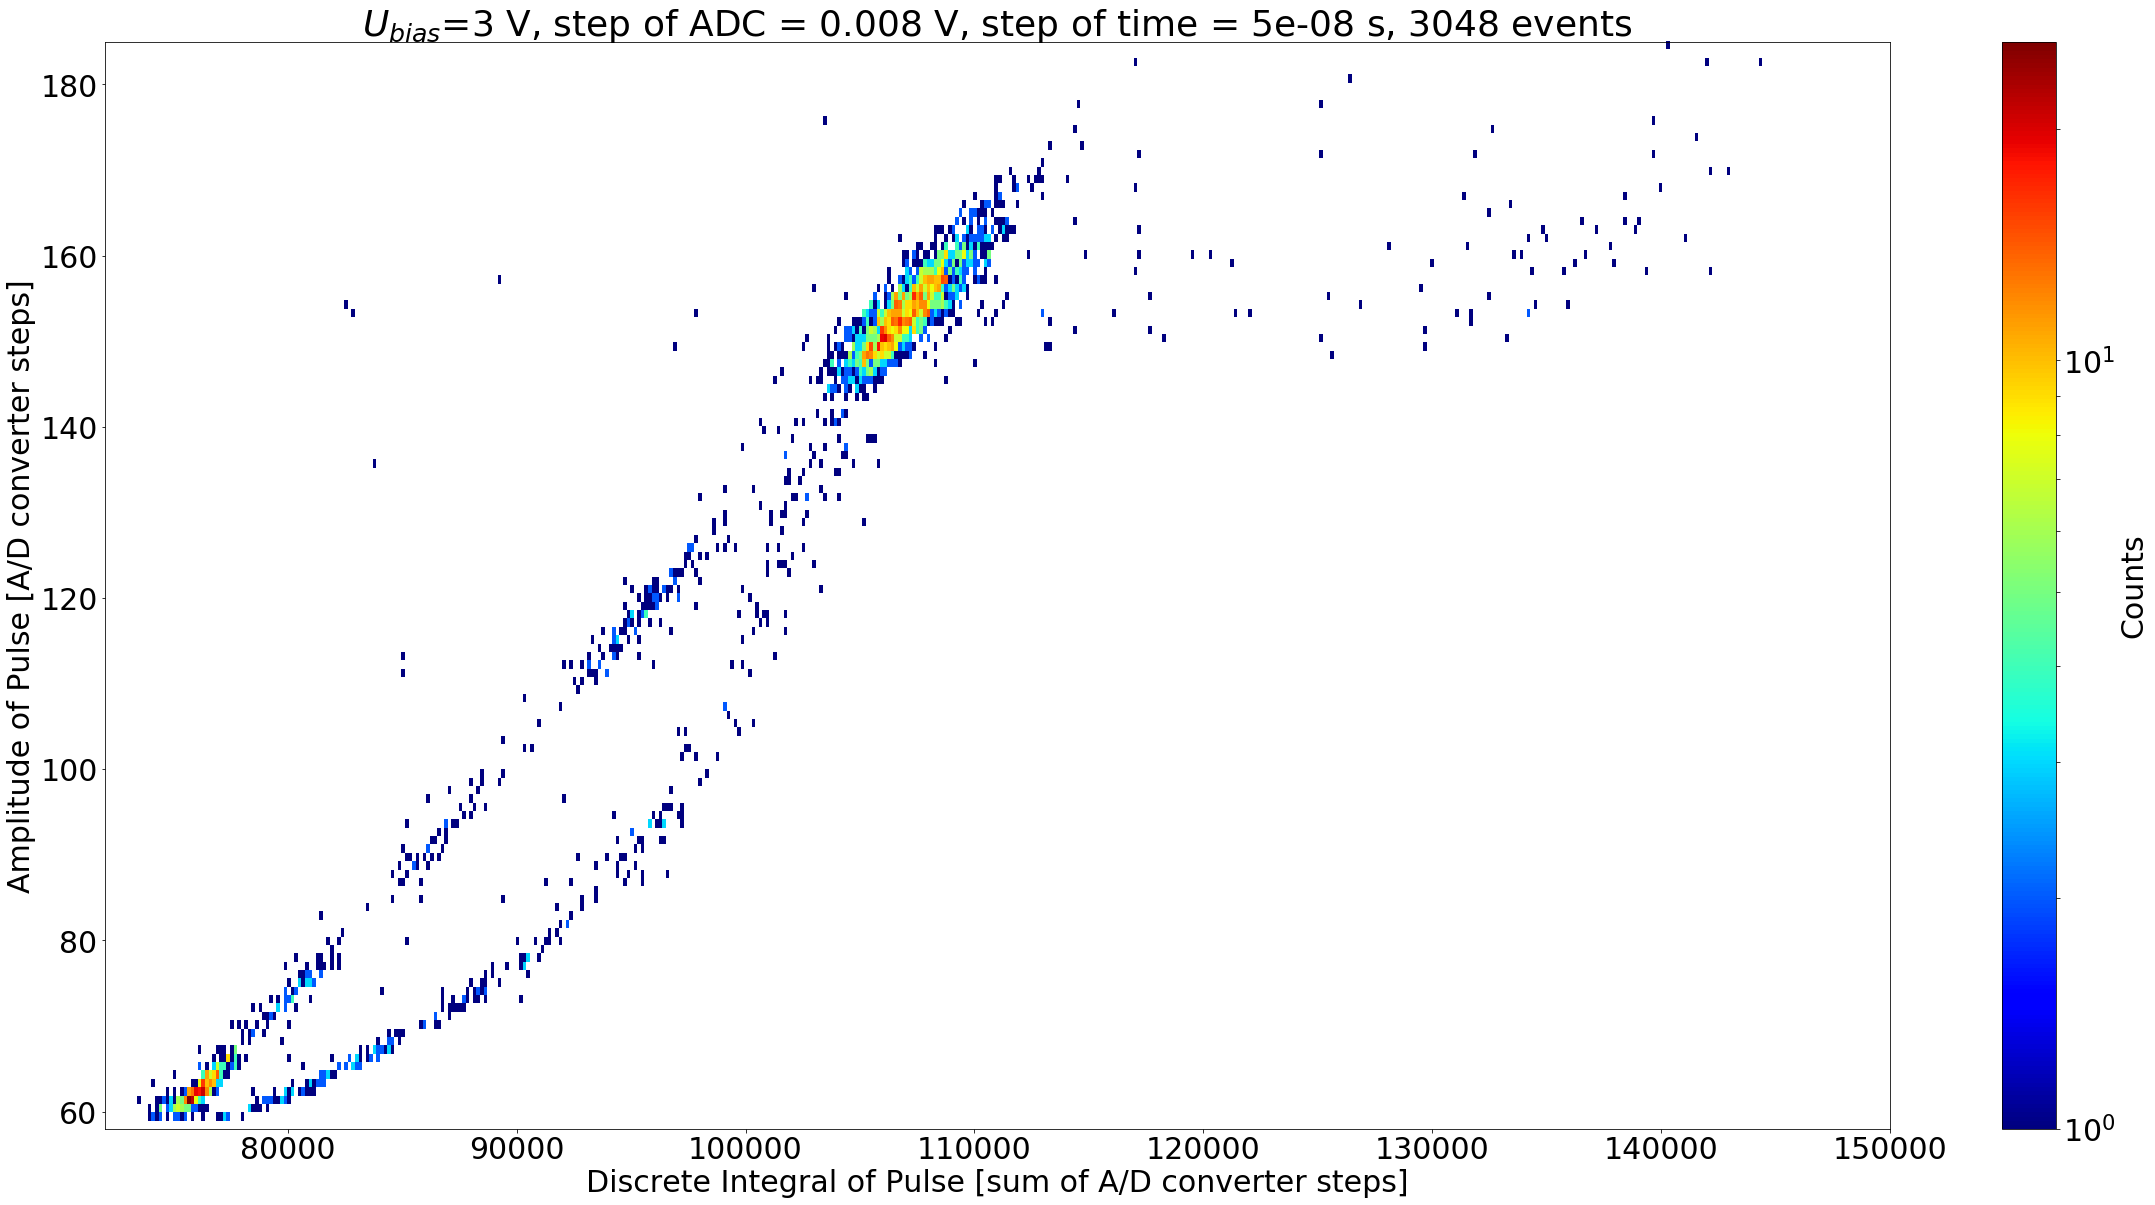

In [42]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for d in ['HIMAC1','HIMAC2']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

#ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 200000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ble = plt.hist2d(y, x, bins=(500,130), range= [[72000, 150000], [58,185]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,130), range= [[10000, 250000], [30,270]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')
plt.title(r'$U_{bias}$=3 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')

   ./data/60-Co-156uV/data44_1574436576-CHAN1.h5
   ./data/60-Co-156uV/data19_1574433358-CHAN1.h5
   ./data/60-Co-156uV/data02_1574431161-CHAN1.h5
   ./data/60-Co-156uV/data50_1574437363-CHAN1.h5
   ./data/60-Co-156uV/data26_1574434269-CHAN1.h5
   ./data/60-Co-156uV/data56_1574438153-CHAN1.h5
   ./data/60-Co-156uV/data54_1574437890-CHAN1.h5
   ./data/60-Co-156uV/data23_1574433877-CHAN1.h5
   ./data/60-Co-156uV/data63_1574439075-CHAN1.h5
   ./data/60-Co-156uV/data42_1574436312-CHAN1.h5
   ./data/60-Co-156uV/data06_1574431675-CHAN1.h5
   ./data/60-Co-156uV/data05_1574431546-CHAN1.h5
   ./data/60-Co-156uV/data67_1574439602-CHAN1.h5
   ./data/60-Co-156uV/data25_1574434137-CHAN1.h5
   ./data/60-Co-156uV/data64_1574439207-CHAN1.h5
   ./data/60-Co-156uV/data43_1574436444-CHAN1.h5
   ./data/60-Co-156uV/data27_1574434400-CHAN1.h5
   ./data/60-Co-156uV/data39_1574435929-CHAN1.h5
   ./data/60-Co-156uV/data03_1574431290-CHAN1.h5
   ./data/60-Co-156uV/data08_1574431934-CHAN1.h5
   ./data/60-Co-156u

<Figure size 1440x720 with 0 Axes>

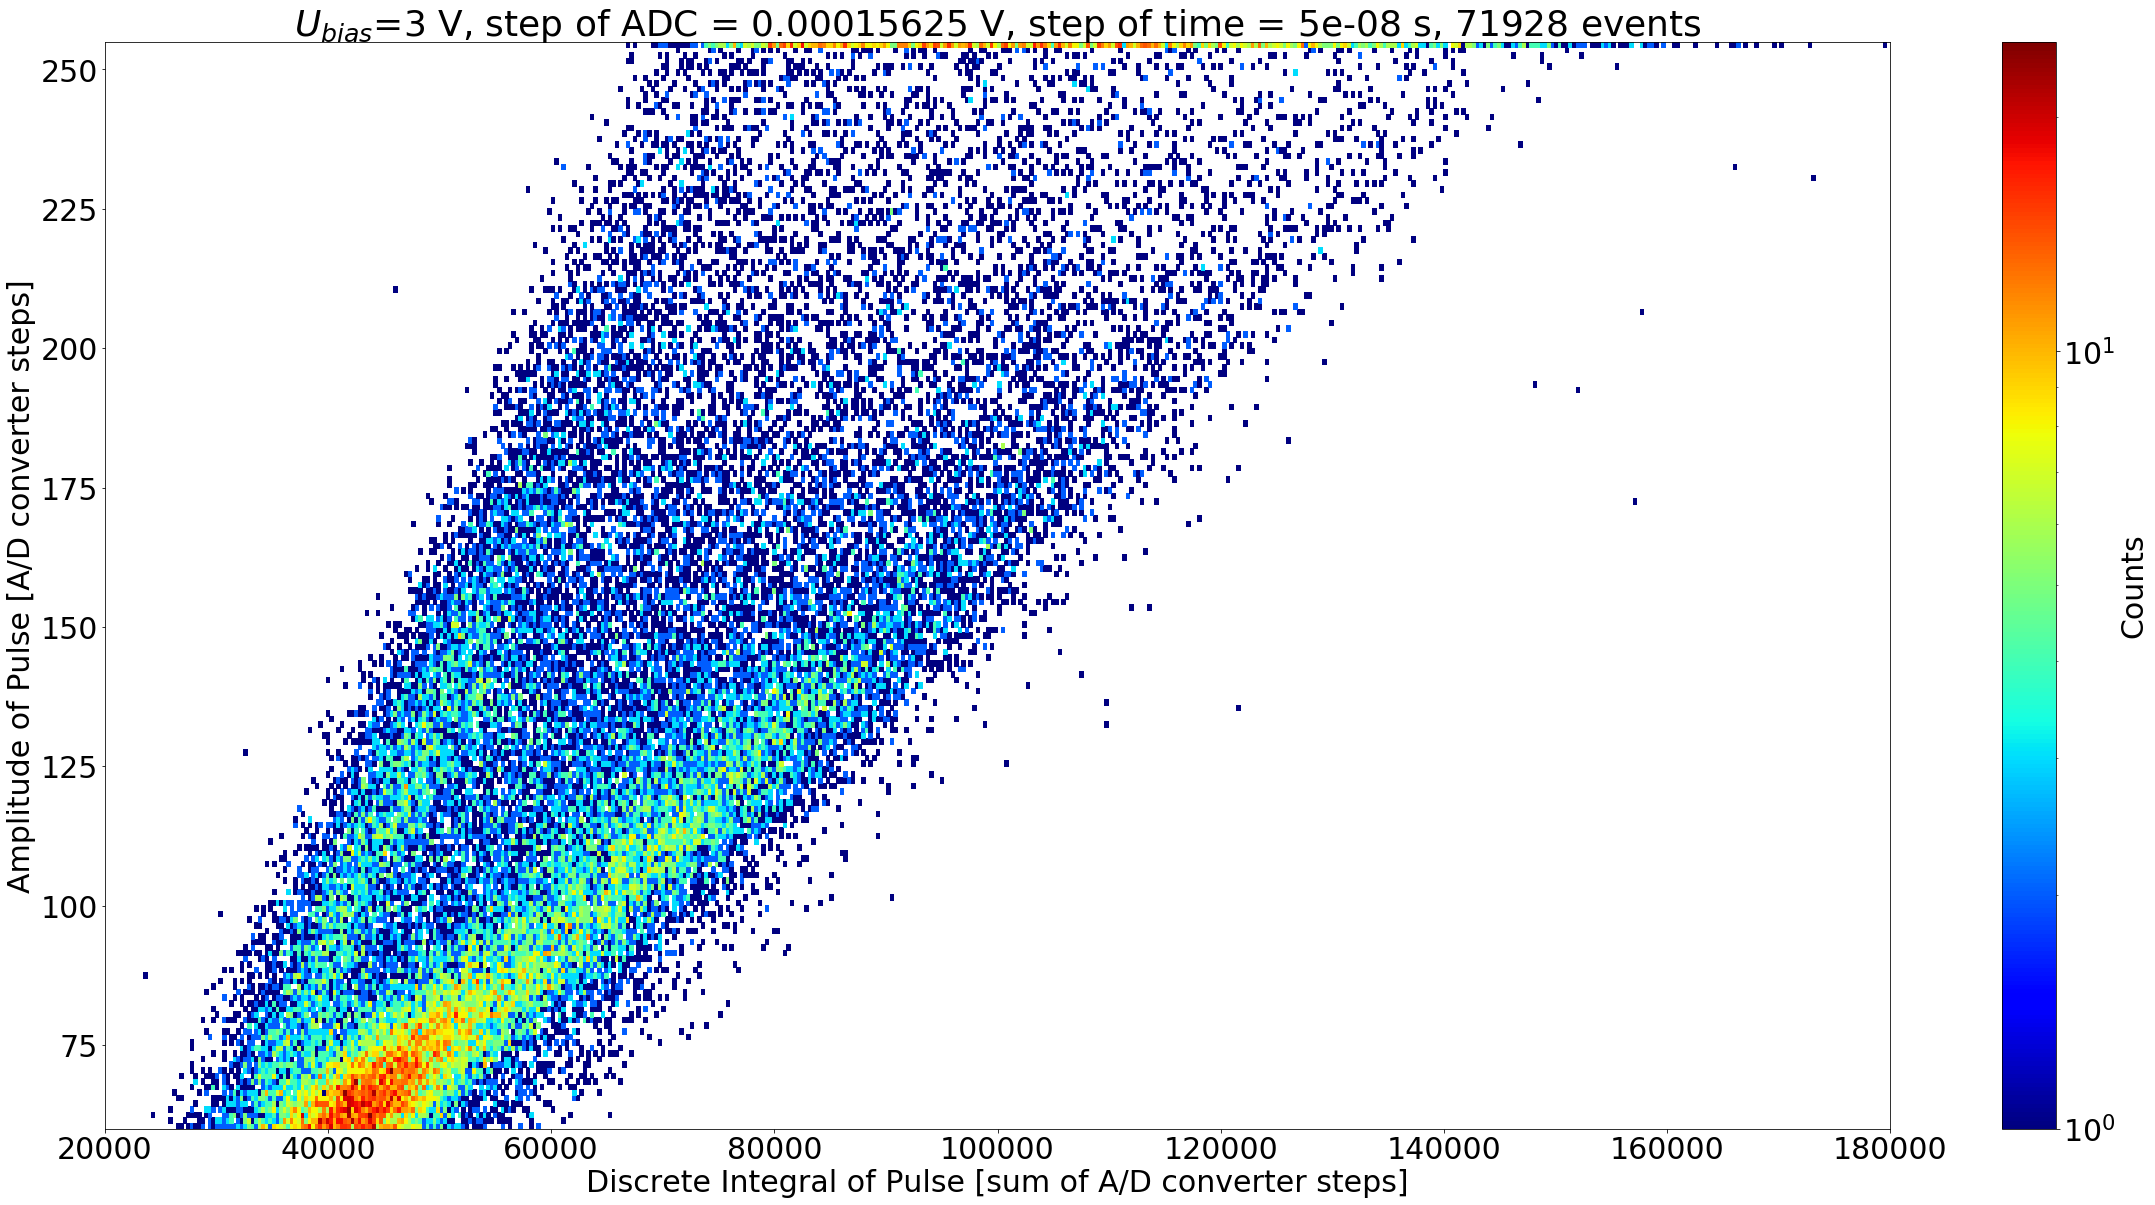

In [39]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        #print ('CAPTURING:', capturing)         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for d in ['60-Co-156uV']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print ('  ', f, end='')
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

#ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 200000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,210), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray)
ble = plt.hist2d(y, x, bins=(500,255-60), range= [[20000, 180000], [60,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')
plt.title(r'$U_{bias}$=3 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')

   ./data/03V/data253.h5   ./data/03V/data255.h5   ./data/03V/data192.h5   ./data/03V/data262.h5   ./data/03V/data263.h5   ./data/03V/data175.h5   ./data/03V/data226.h5   ./data/03V/data176.h5   ./data/03V/data239.h5   ./data/03V/data200.h5   ./data/03V/data225.h5   ./data/03V/data172.h5   ./data/03V/data196.h5   ./data/03V/data257.h5   ./data/03V/data209.h5   ./data/03V/data166.h5   ./data/03V/data252.h5   ./data/03V/data258.h5   ./data/03V/data195.h5   ./data/03V/data191.h5   ./data/03V/data259.h5   ./data/03V/data248.h5   ./data/03V/data210.h5   ./data/03V/data201.h5   ./data/03V/data203.h5   ./data/03V/data202.h5   ./data/03V/data243.h5   ./data/03V/data234.h5   ./data/03V/data219.h5   ./data/03V/data185.h5   ./data/03V/data251.h5   ./data/03V/data215.h5   ./data/03V/data224.h5   ./data/03V/data231.h5   ./data/03V/data199.h5   ./data/03V/data178.h5   ./data/03V/data232.h5   ./data/03V/data189.h5   ./data/03V/data240.h5   ./data/03V/data184.h5   ./data/03V/data187.h5   ./data/03V/da

 ./data/30V/data57.h5   ./data/30V/data71.h5   ./data/30V/data42.h5   ./data/30V/data23.h5   ./data/30V/data89.h5   ./data/30V/data14.h5   ./data/30V/data61.h5   ./data/30V/data45.h5   ./data/30V/data32.h5   ./data/30V/data98.h5   ./data/30V/data67.h5   ./data/30V/data58.h5   ./data/30V/data68.h5   ./data/30V/data52.h5   ./data/30V/data44.h5   ./data/30V/data1.h5   ./data/30V/data82.h5   ./data/30V/data31.h5   ./data/30V/data46.h5   ./data/30V/data53.h5   ./data/30V/data97.h5   ./data/30V/data8.h5   ./data/30V/data51.h5   ./data/30V/data55.h5   ./data/30V/data99.h5   ./data/30V/data88.h5   ./data/30V/data59.h5   ./data/30V/data34.h5   ./data/30V/data83.h5   ./data/30V/data100.h5   ./data/30V/data33.h5   ./data/30V/data28.h5   ./data/30V/data90.h5   ./data/30V/data15.h5   ./data/30V/data81.h5   ./data/30V/data38.h5   ./data/30V/data54.h5   ./data/30V/data47.h5   ./data/30V/data41.h5   ./data/30V/data78.h5   ./data/30V/data60.h5   ./data/30V/data56.h5

<Figure size 1440x720 with 0 Axes>

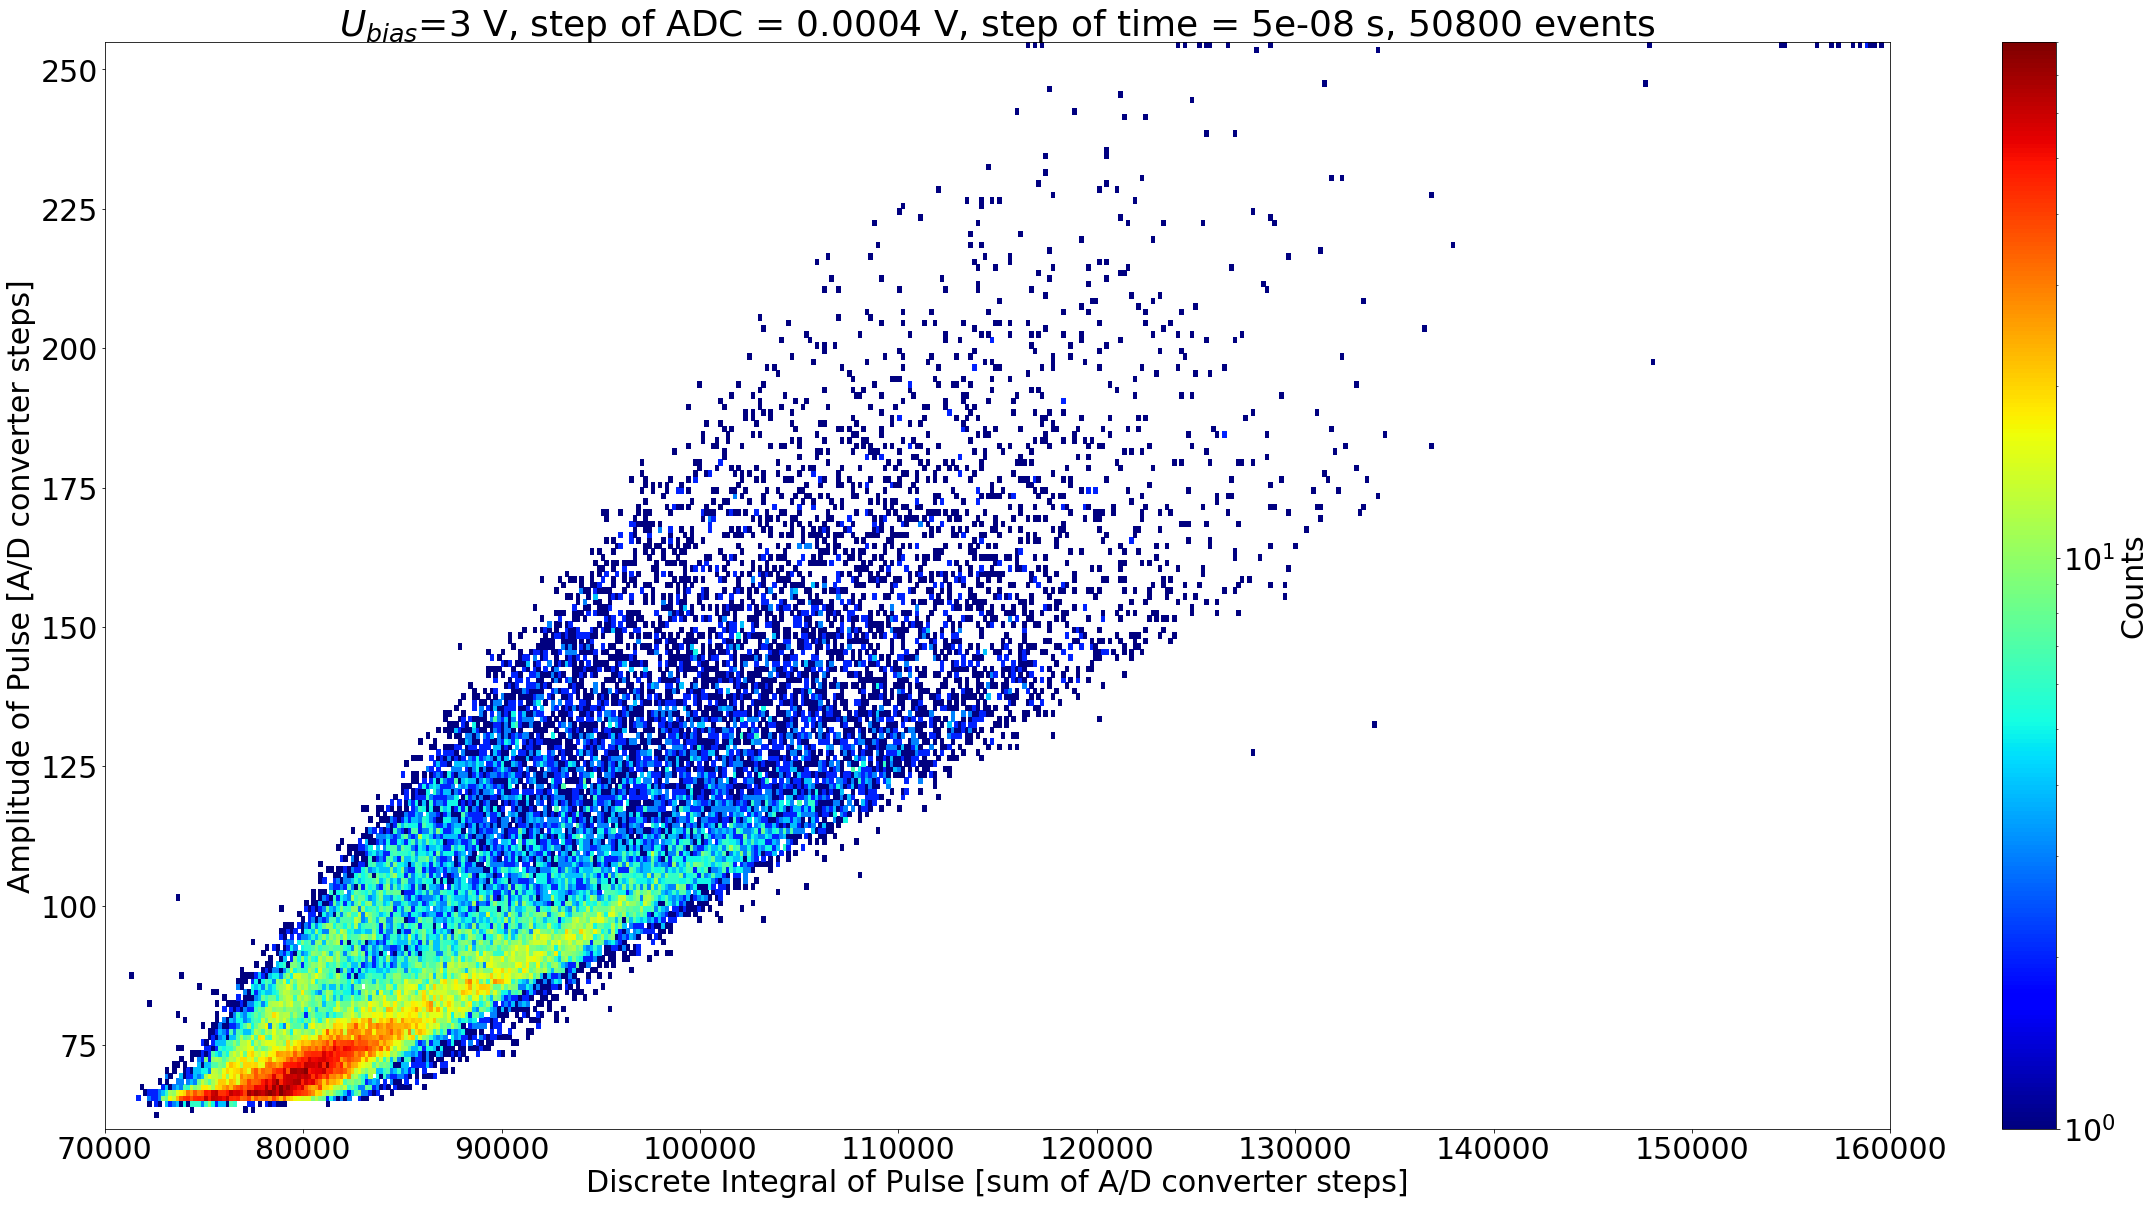

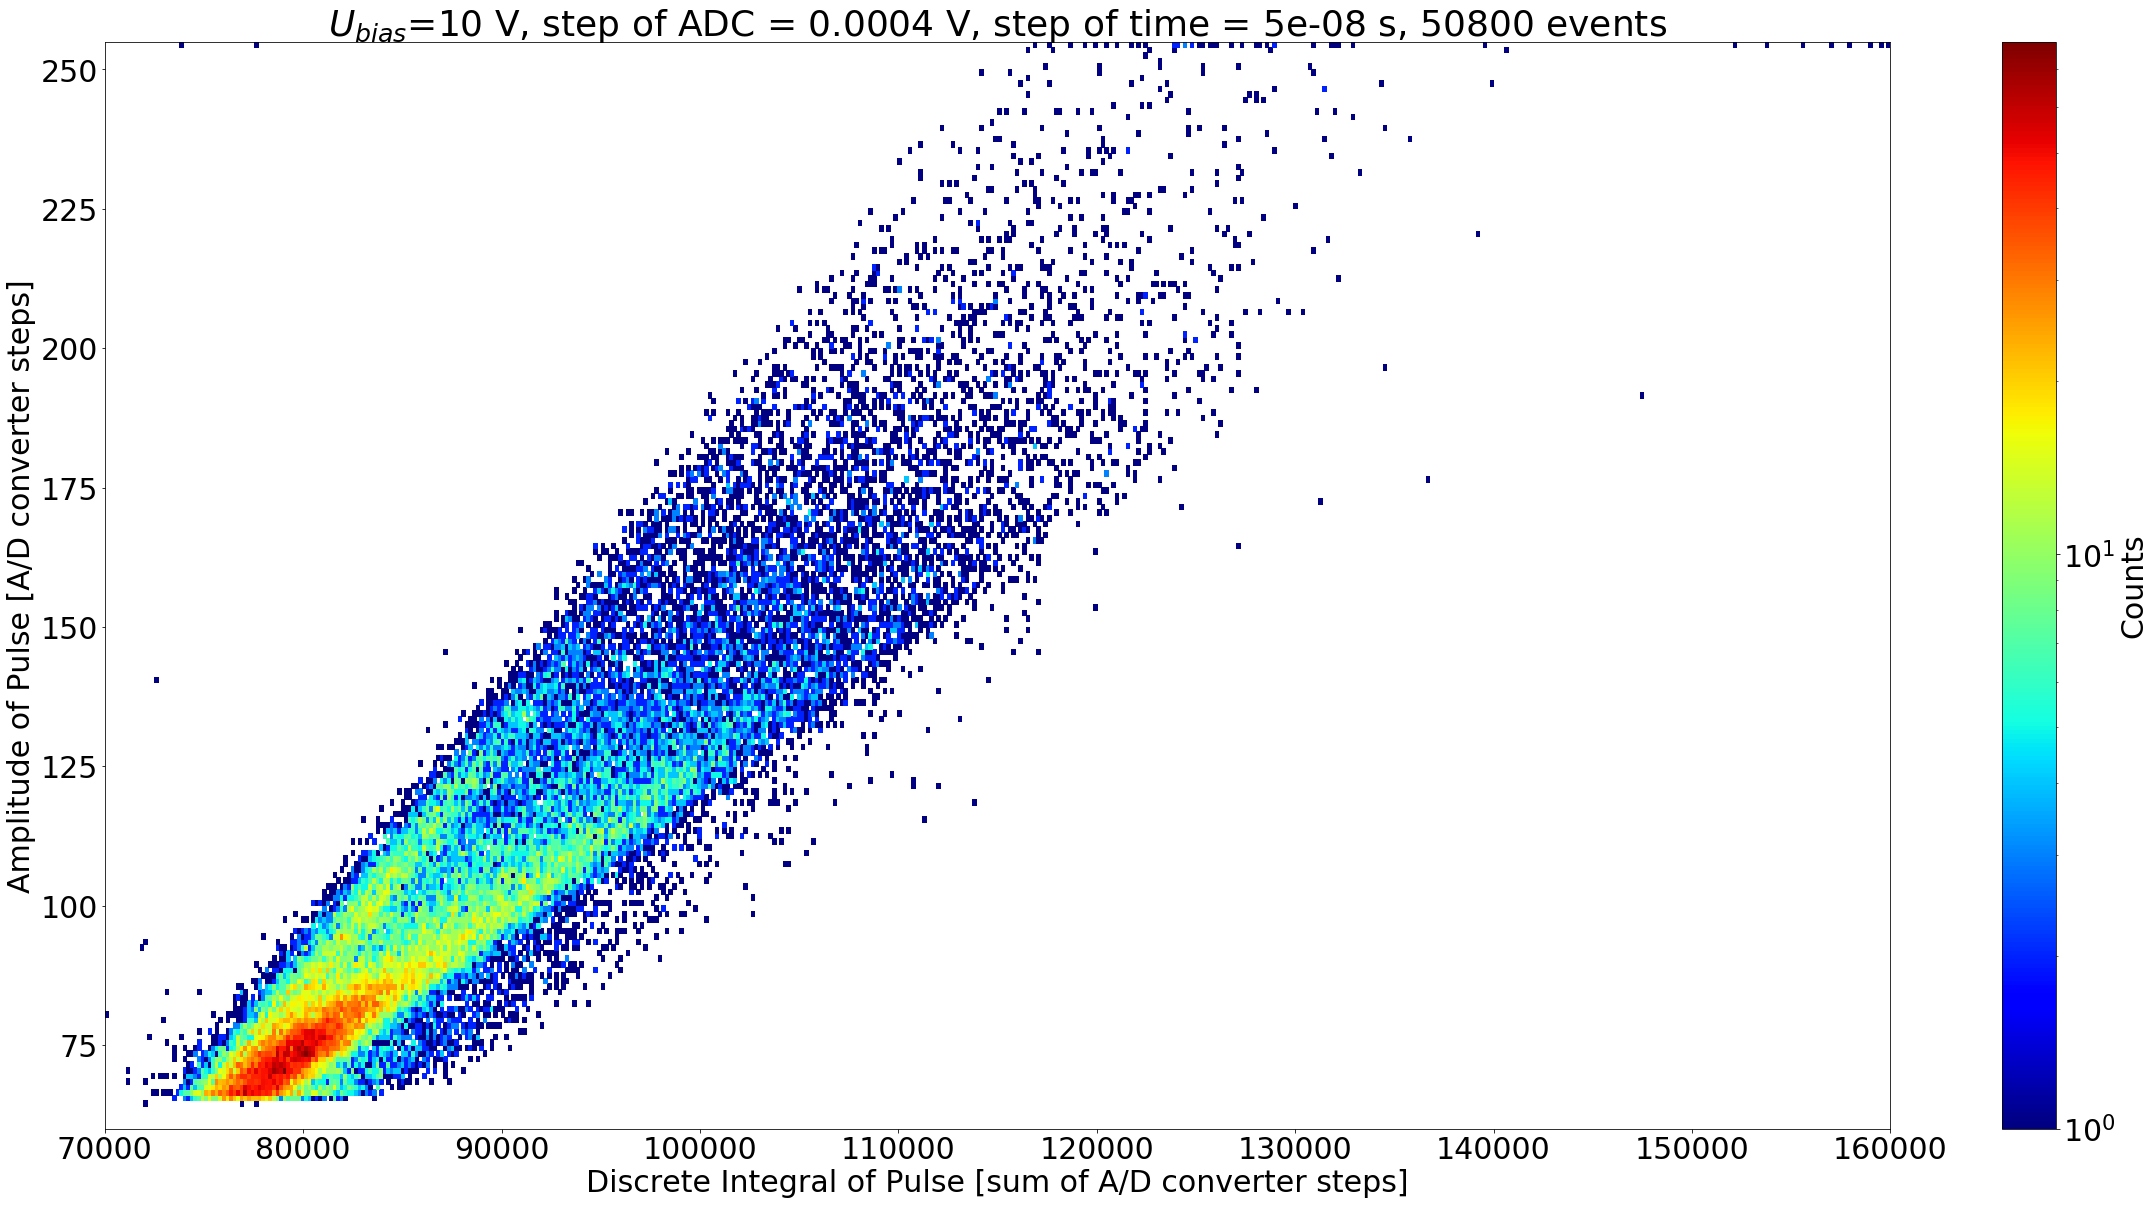

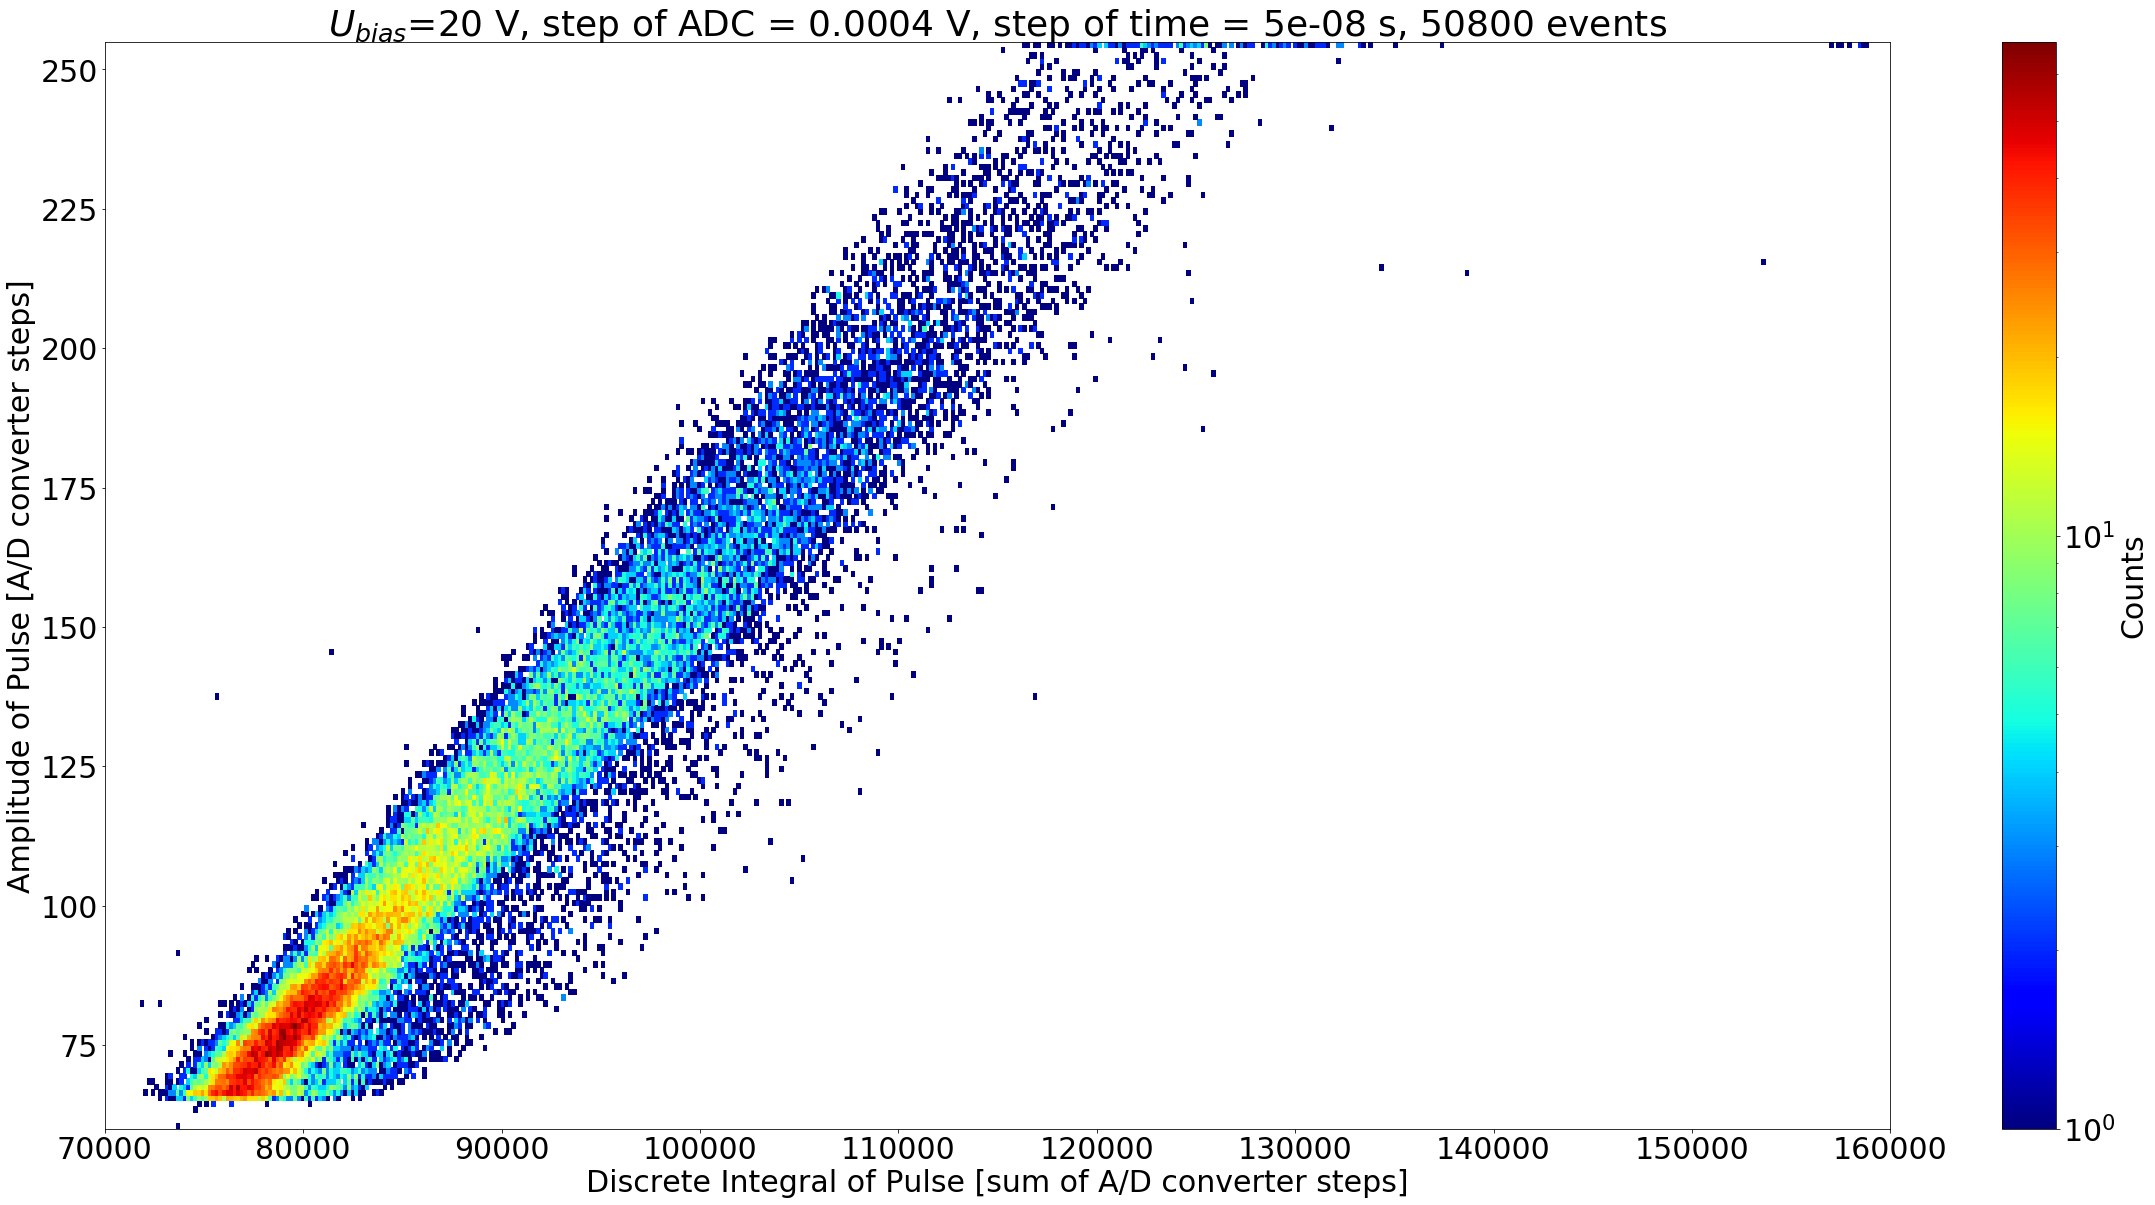

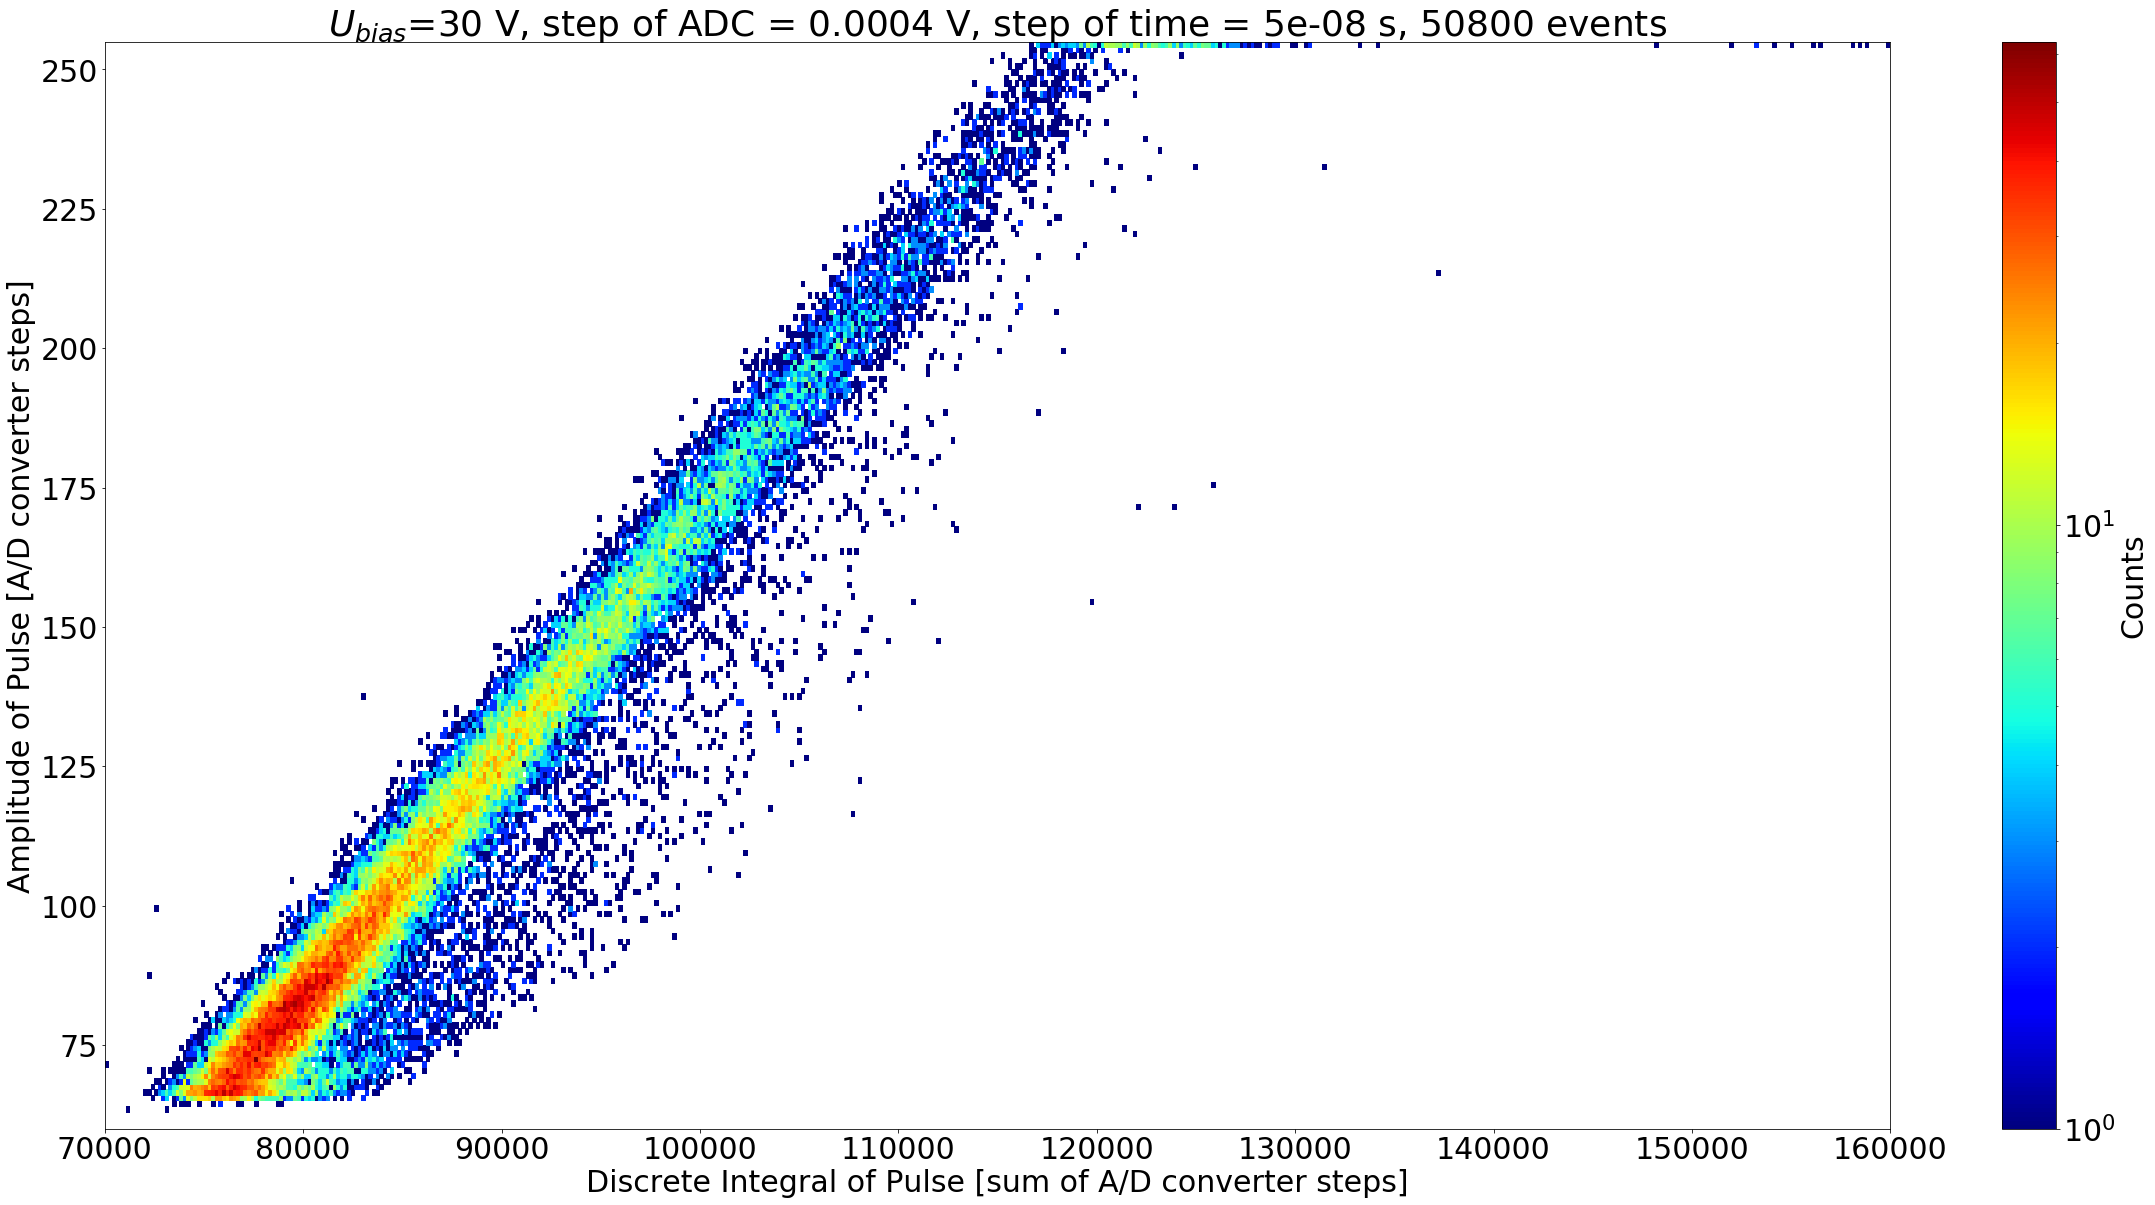

In [46]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        #print ('CAPTURING:', capturing)         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for d in ['03V']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print ('  ', f, end='')
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

#ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 200000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,210), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray)
ble = plt.hist2d(y, x, bins=(500,255-60), range= [[70000, 160000], [60,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')
plt.title(r'$U_{bias}$=3 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

for d in ['10V']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print ('  ', f, end='')
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

#ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 200000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,210), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray)
ble = plt.hist2d(y, x, bins=(500,255-60), range= [[70000, 160000], [60,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')
plt.title(r'$U_{bias}$=10 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

for d in ['20V']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print ('  ', f, end='')
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

#ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 200000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,210), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray)
ble = plt.hist2d(y, x, bins=(500,255-60), range= [[70000, 160000], [60,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')
plt.title(r'$U_{bias}$=20 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

for d in ['30V']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print ('  ', f, end='')
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

#ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 200000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,210), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray)
ble = plt.hist2d(y, x, bins=(500,255-60), range= [[70000, 160000], [60,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')
plt.title(r'$U_{bias}$=30 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')


   ./data/FL390/data09_1511962768.h5 CAPTURING: 316.99
   ./data/FL390/data18_1511965898.h5 CAPTURING: 230.19
   ./data/FL390/data19_1511966209.h5 CAPTURING: 218.72
   ./data/FL390/data17_1511965576.h5 CAPTURING: 232.44
   ./data/FL390/data13_1511964266.h5 CAPTURING: 265.95
   ./data/FL390/data23_1511967451.h5 CAPTURING: 226.18
   ./data/FL390/data24_1511967767.h5 CAPTURING: 223.24
   ./data/FL390/data21_1511966824.h5 CAPTURING: 210.5
   ./data/FL390/data16_1511965252.h5 CAPTURING: 239.67
   ./data/FL390/data10_1511963152.h5 CAPTURING: 292.04
   ./data/FL390/data15_1511964921.h5 CAPTURING: 229.23
   ./data/FL390/data20_1511966522.h5 CAPTURING: 221.03
   ./data/FL390/data25_1511968088.h5 CAPTURING: 230.08
   ./data/FL390/data12_1511963908.h5 CAPTURING: 285.96
   ./data/FL390/data11_1511963530.h5 CAPTURING: 286.81
   ./data/FL390/data14_1511964600.h5 CAPTURING: 241.87
   ./data/FL390/data22_1511967133.h5 CAPTURING: 217.59
   ./data/60-Co/data02_1572602437-CHAN1.h5 CAPTURING: 7.74
   ./da

Text(0,0.5,'Amplitude of Pulse [A/D converter steps]')

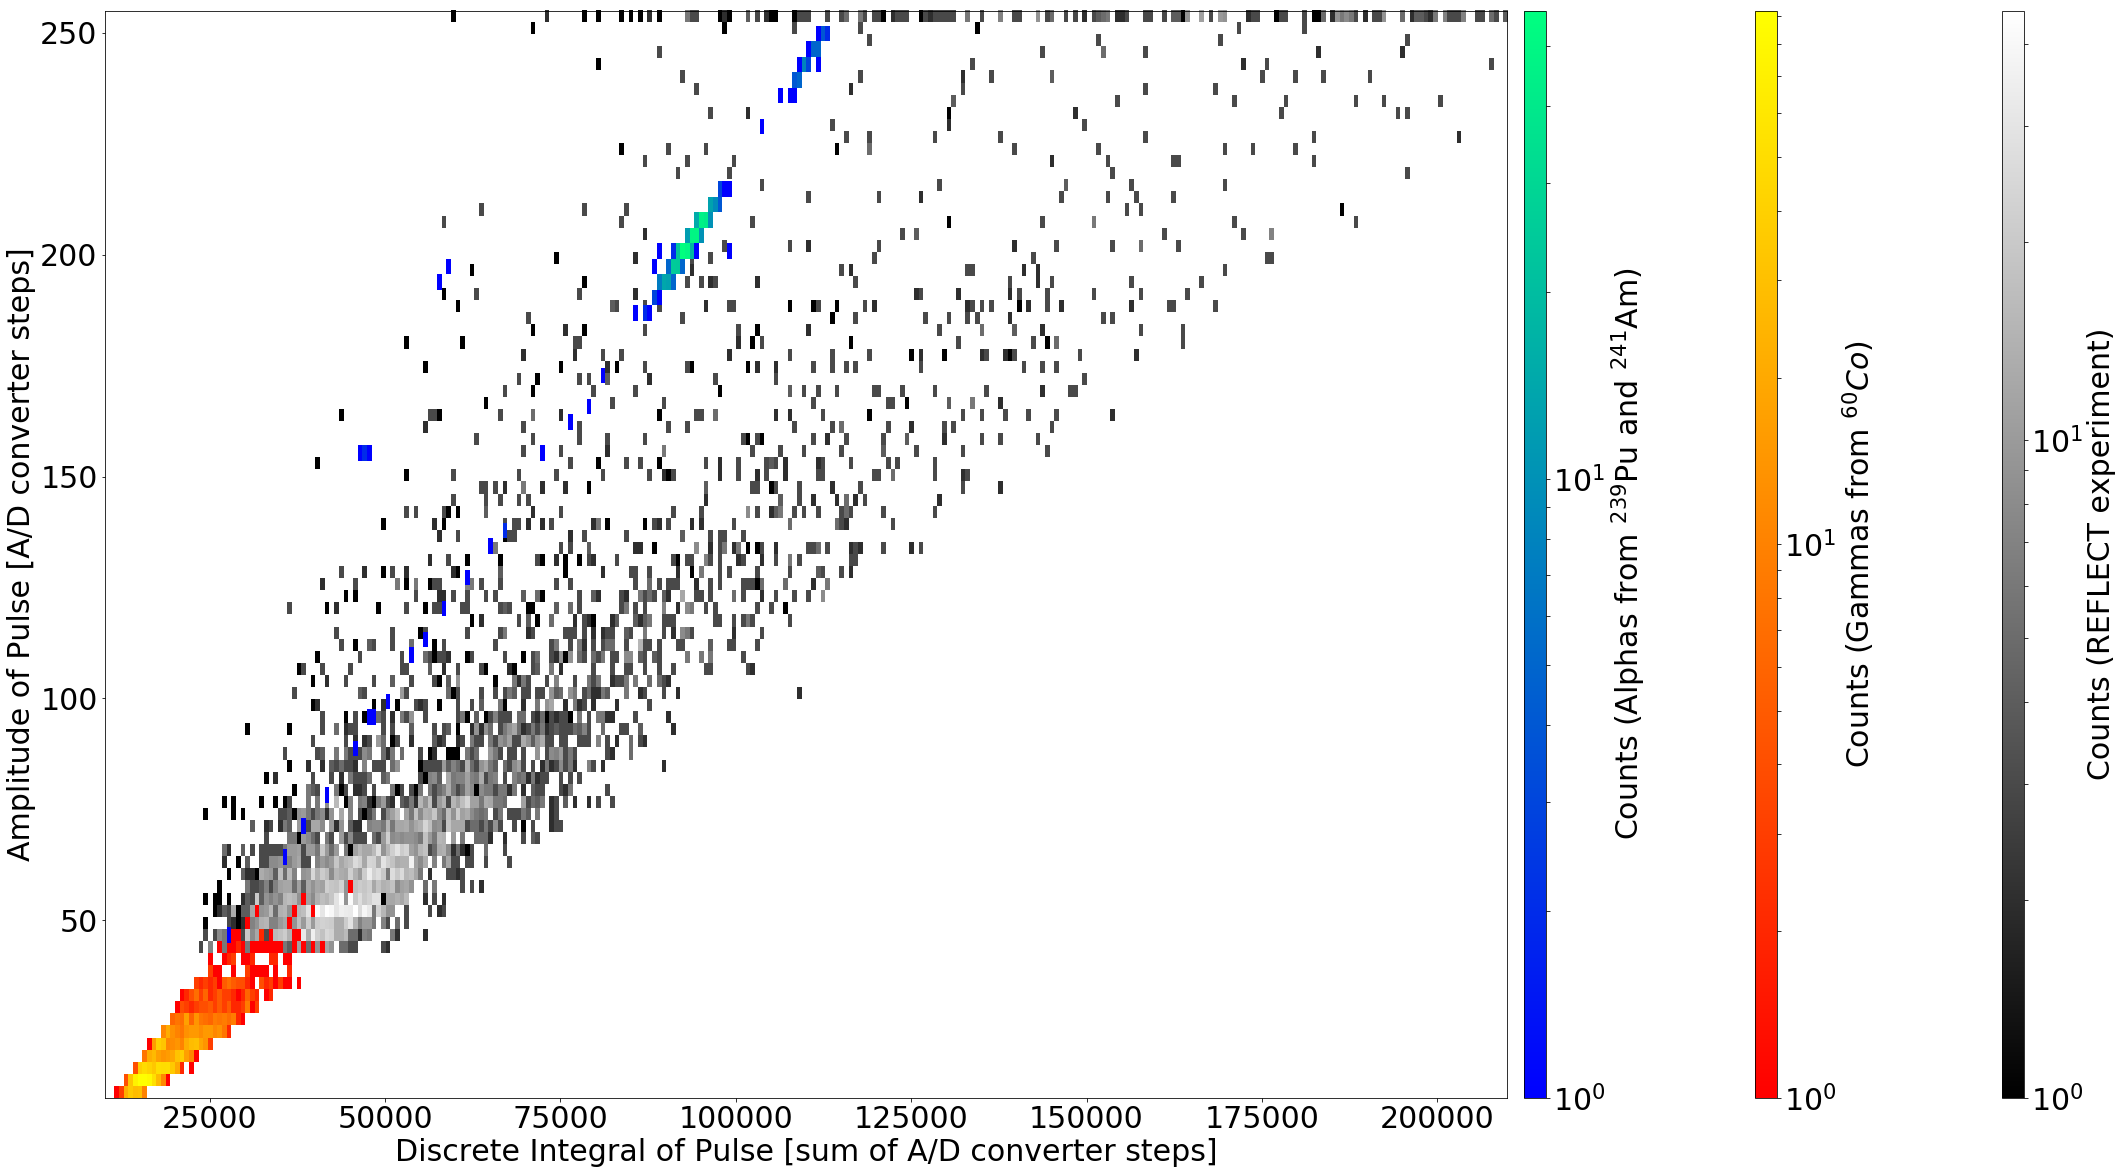

In [80]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            np_data = np.array(data)
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum)
                y.append(suma)
                z.append((maximum))

plt.figure(figsize=(40,20))             
matplotlib.rcParams.update({'font.size': 30})
plt.tight_layout()

for d in ['FL390']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(44)
        except:        
            pass
        #break
        
ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 210000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray)
plt.colorbar(label=r'Counts (REFLECT experiment)', orientation='vertical', aspect=50, pad=-0.02)
x = []
y = []
z = []

for d in ['60-Co']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass


ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 210000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.autumn)
plt.colorbar(label='Counts (Gammas from $^{60}Co)$', orientation='vertical', aspect=50, pad=-0.01)
x = []
y = []
z = []

for d in ['241-Am']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(40)
        except:        
            pass

ble = plt.hist2d(y, x, bins=(300,70), range= [[10000, 210000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.winter)
plt.colorbar(label=r'Counts (Alphas from $^{239}$Pu and $^{241}$Am)', orientation='vertical', aspect=50, pad=0.01)

plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')

#plt.text(150,75000,'2')
#plt.text(170,175000,'3')


# Simply replot the current x, y in a nicer way

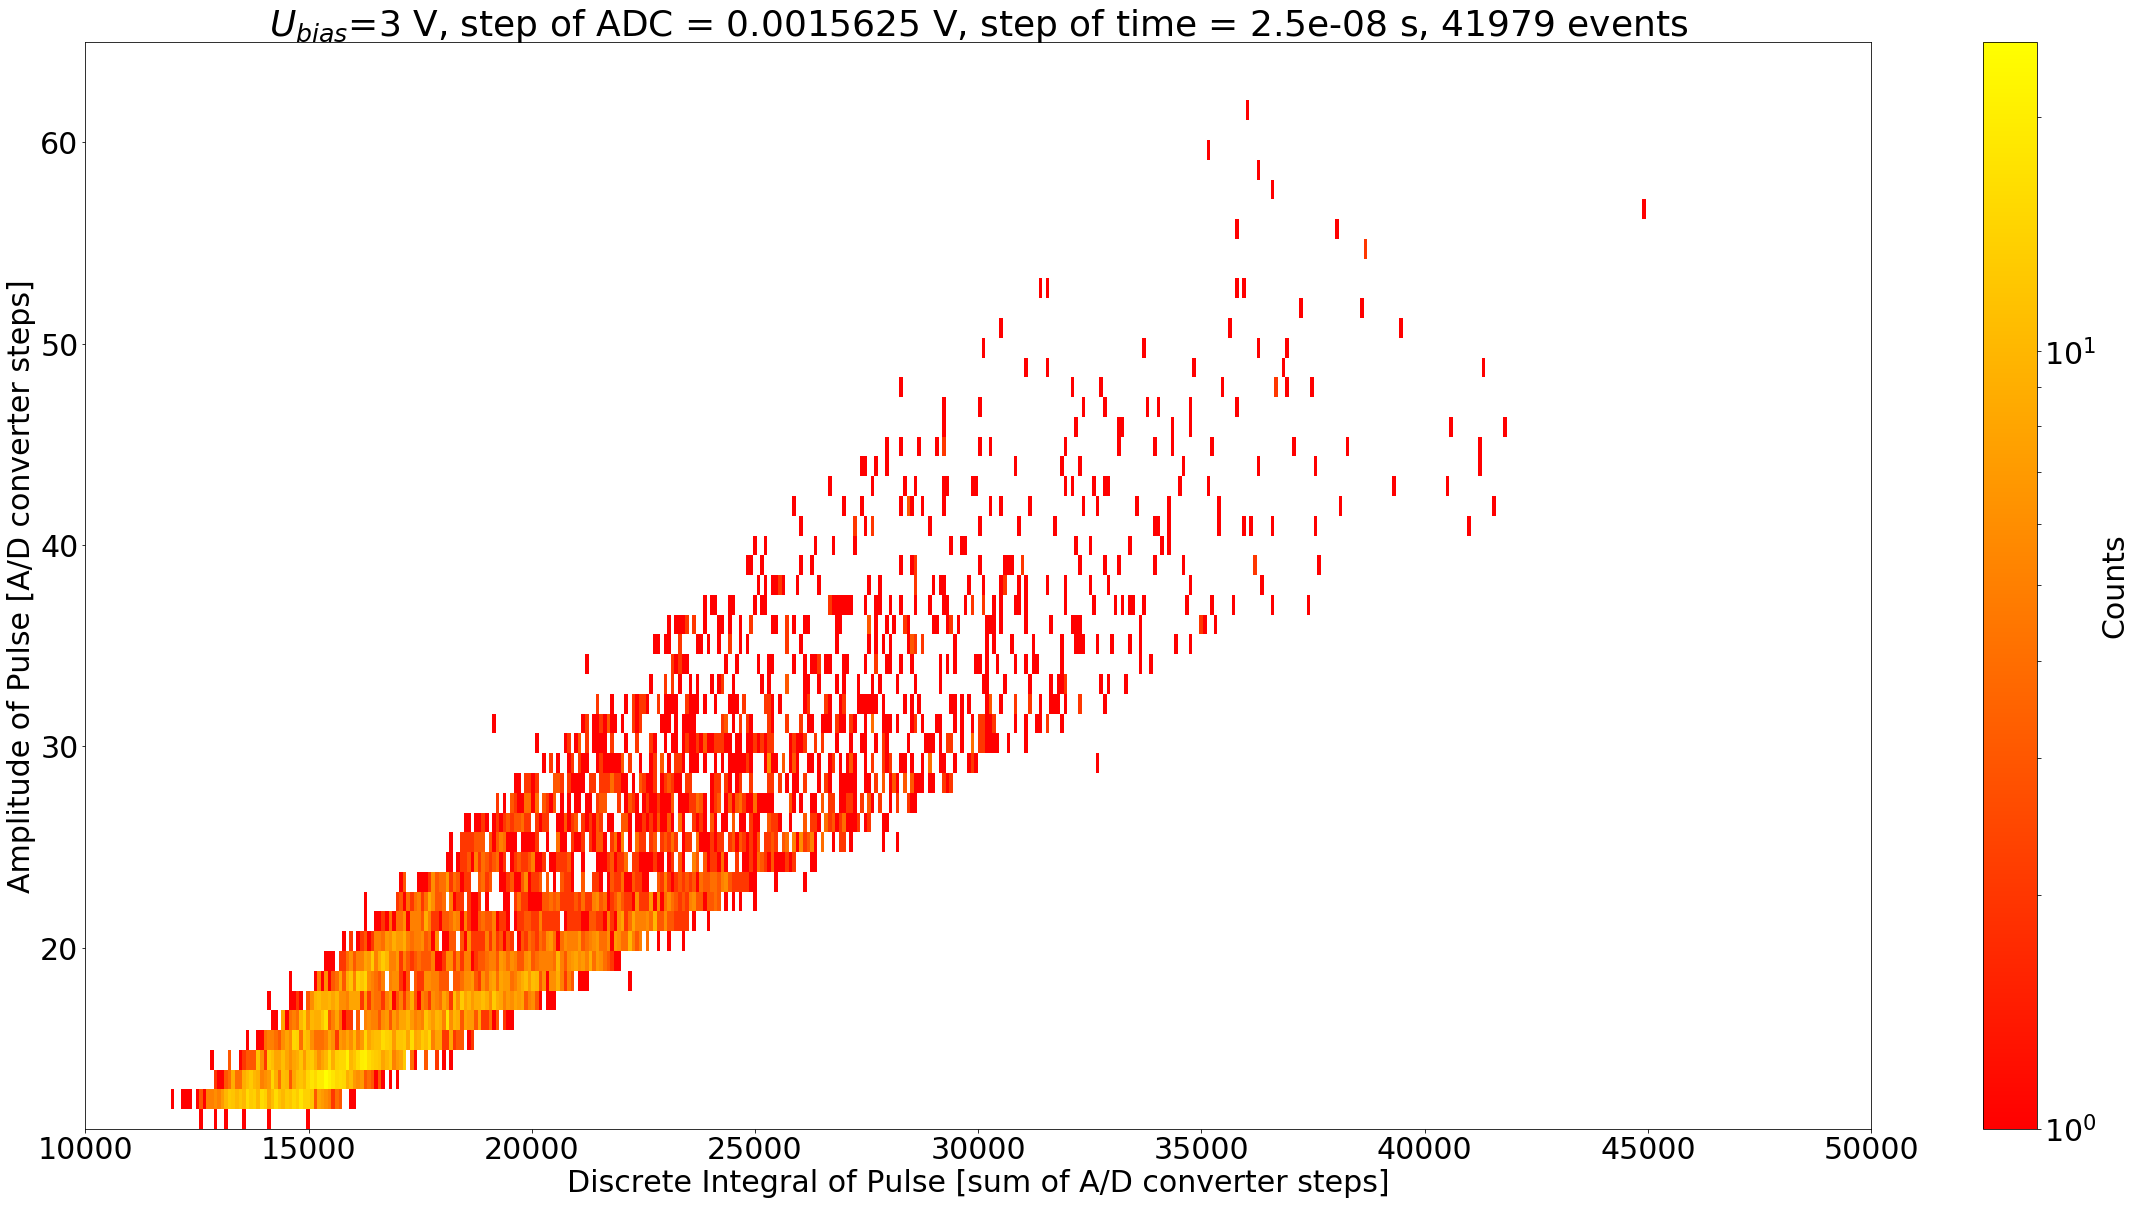

In [51]:
matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

#ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 200000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,130), range= [[72000, 150000], [58,185]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#HIMAC ble = plt.hist2d(y, x, bins=(500,130), range= [[10000, 250000], [30,270]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ble = plt.hist2d(y, x, bins=(500,55), range= [[10000, 50000], [11,65]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.autumn)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')
plt.title(r'$U_{bias}$=3 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')

## Flat histogram (only X or Y)

Text(0.5, 1.0, 'Surface')

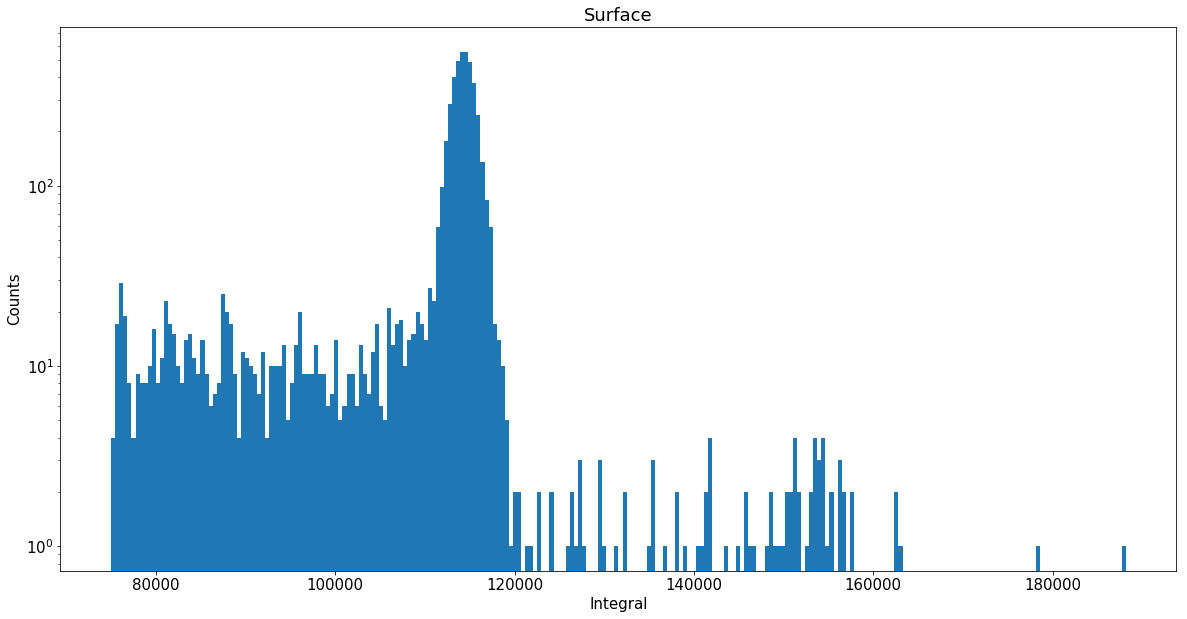

In [76]:
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))

ble = plt.hist(y, bins=250)
plt.yscale('log')
#plt.xscale('log')
#plt.ylim(0,200)
#plt.xlim(1000,140000)
plt.xlabel('Integral')
plt.ylabel('Counts')
plt.title('Surface')

Text(0.5, 1.0, 'Amplitude')

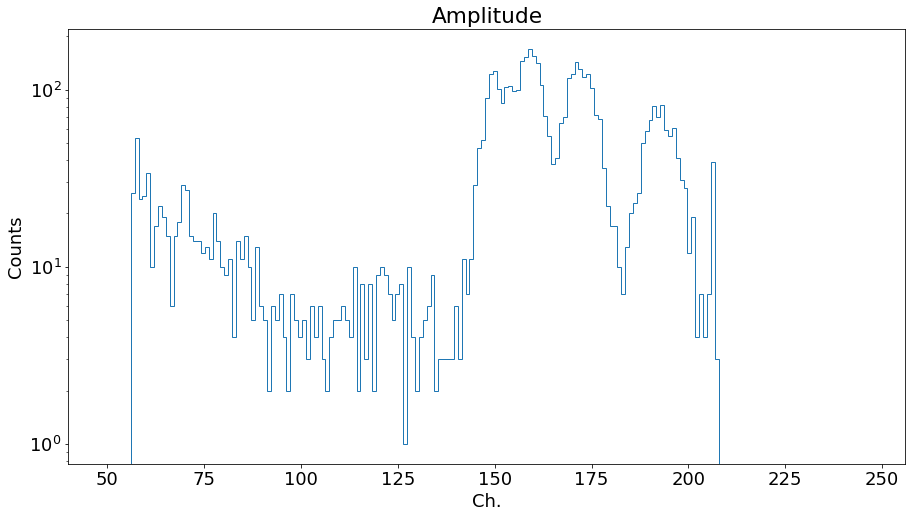

In [77]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(15,8))

ble = plt.hist(x, bins=256-40-1, range=(40,256), histtype='step' )
plt.yscale('log')
#plt.xscale('log')
#plt.ylim(0,200)
plt.xlim(40,256)
plt.xlabel('Ch.')
plt.ylabel('Counts')
plt.title('Amplitude')

## Cut Plot

./data/CERF/data00_1528486362-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -89.0


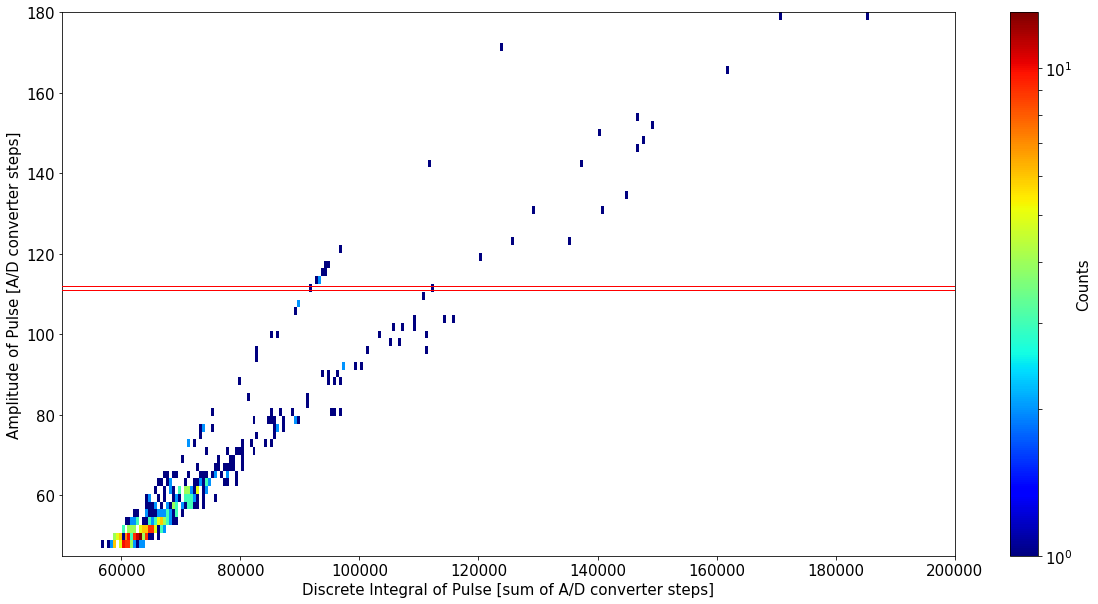

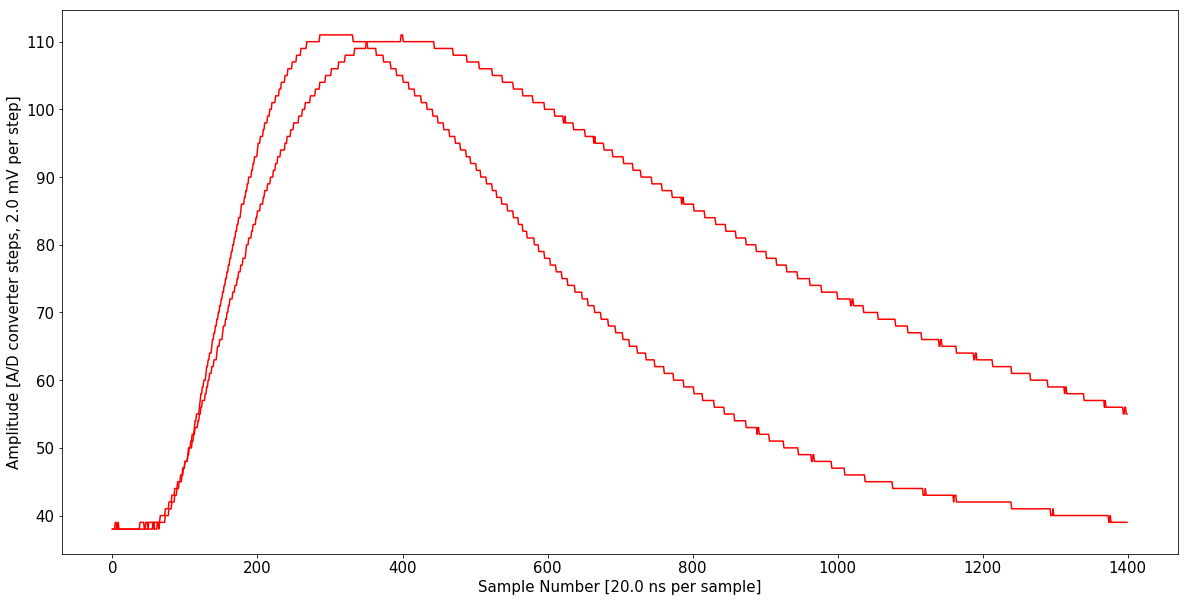

In [35]:
matplotlib.rcParams.update({'font.size': 15})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/CERF/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]

                    if (maximum <= maxmax) and (maximum >= minmin):
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/CERF/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')

ble = plt.hist2d(y, x, bins=(300,70), range= [[50000, 200000], [45,180]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,128),  cmap=plt.cm.jet)
#plt.xlim(60000,125000)
#plt.ylim(50,225)
#plt.title('CANDY')
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')
cb = plt.colorbar(label='Counts')

maxmax1 = 111
maxmax2 = 100
maxmax3 = 100
maxmax4 = 46
maxmax5 = 35
width = 1

minmin1 = maxmax1-width
plt.plot([0,250000],[maxmax1+1,maxmax1+1],c='r',lw=1,zorder=99)
plt.plot([0,250000],[minmin1+1,minmin1+1],c='r',lw=1,zorder=99)

minmin2 = maxmax2-width
#plt.plot([0,150000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
#plt.plot([0,150000],[minmin2,minmin2],c='g',lw=1,zorder=99)

minmin3 = maxmax3-width
#plt.plot([0,150000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
#plt.plot([0,150000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

minmin4 = maxmax4-width
#plt.plot([0,150000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
#plt.plot([0,150000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

minmin5 = maxmax5-width
#plt.plot([0,150000],[maxmax5,maxmax5],c='grey',lw=1,zorder=99)
#plt.plot([0,150000],[minmin5,minmin5],c='grey',lw=1,zorder=99)

plt.figure(2,figsize=(20,10))
#matplotlib.rc('axes',edgecolor='r')
Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
#Cut(maxmax3,minmin3,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [A/D converter steps, '+ str(yinc*1e3) + ' mV per step]')

plt.show()

./data/CERF/data02_1528489618-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -89.0
./data/CERF/data04_1528489835-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -89.0
./data/CERF/data00_1528488737-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -89.0
./data/CERF/data07_1528490165-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -89.0
./data/CERF/data05_1528489949-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -89.0
./data/CERF/data06_1528490052-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -89.0
./data/CERF/data03_1528489721-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -89.0
./data/CERF/data01_1528488884-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -89.0
./data/CERF/data14_1528491001-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 92  YORIGIN: -89.0
./data/CERF/data00_1528489262-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 508  YORIGIN: -89.0
./data/CERF/data11_1528490655-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES

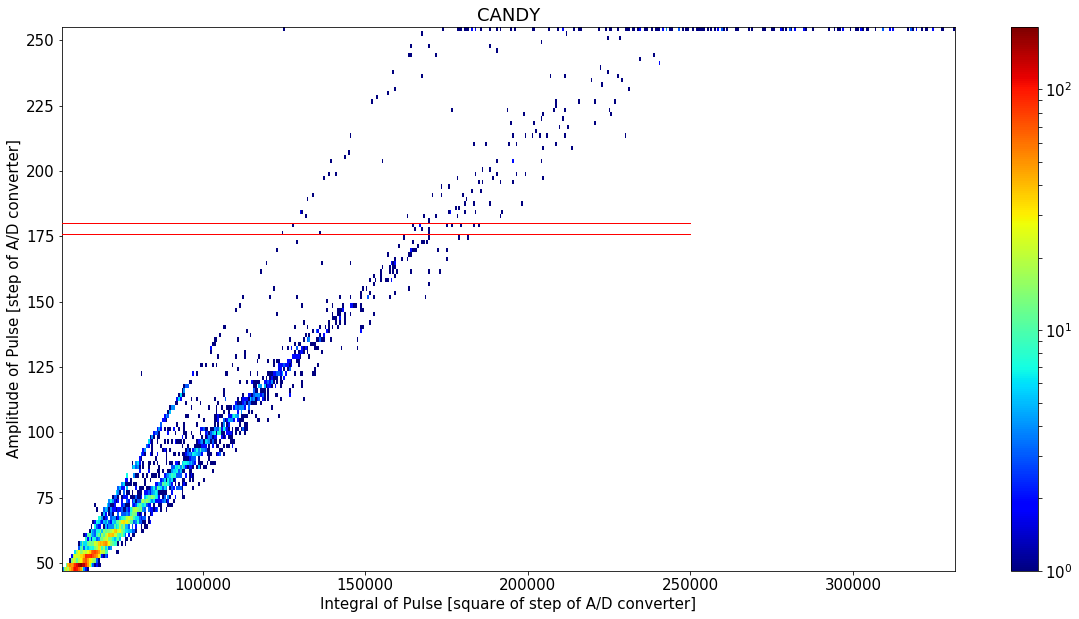

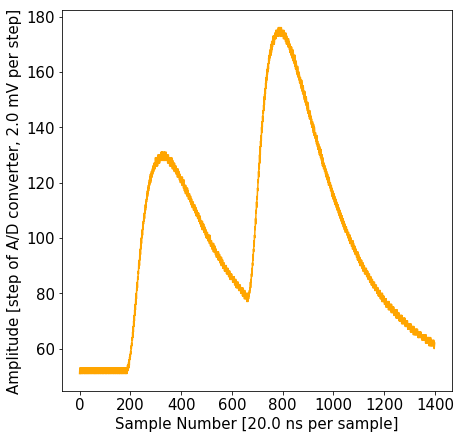

In [3]:
matplotlib.rcParams.update({'font.size': 15})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/HIMAC1/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    suma = 0
                    colour = 'black'
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]
                        suma = suma + np_data[i]
                        
                    if (maximum <= maxmax) and (maximum >= minmin):
                        if (suma>0) and (suma<73000):
                            colour = 'red'
                        if (suma>73000) and (suma<82000):
                            colour = 'green'
                        if (suma>82000) and (suma<100000):
                            colour = 'purple'
                        if (suma>100000) and (suma<150000):
                            colour = 'orange'
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/CERF/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')
plt.xlim(42000,175000)
plt.ylim(35,130)

ble = plt.hist2d(y, x, bins=(500,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.title('CANDY')
plt.xlabel('Integral of Pulse [square of step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()

maxmax1 = 180
maxmax2 = 167
maxmax3 = 180
maxmax4 = 105
maxmax5 = 150
width = 4

minmin1 = maxmax1-width
plt.plot([0,250000],[maxmax1,maxmax1],c='r',lw=1,zorder=99)
plt.plot([0,250000],[minmin1,minmin1],c='r',lw=1,zorder=99)

minmin2 = maxmax2-width
#plt.plot([0,175000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
#plt.plot([0,175000],[minmin2,minmin2],c='g',lw=1,zorder=99)

minmin3 = maxmax3-width
#plt.plot([0,250000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
#plt.plot([0,250000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

minmin4 = maxmax4-width
#plt.plot([0,175000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
#plt.plot([0,175000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

minmin5 = maxmax5-width
#plt.plot([0,175000],[maxmax5,maxmax5],c='grey',lw=1,zorder=99)
#plt.plot([0,175000],[minmin5,minmin5],c='grey',lw=1,zorder=99)

plt.figure(2,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
#Cut(maxmax3,minmin3,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.show()

## Vertical Cut

In [32]:
matplotlib.rcParams.update({'font.size': 15})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    suma = 0
                    colour = 'black'
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]
                        suma = suma + np_data[i]
                        
                    if (maximum <= maxmax) and (maximum >= minmin):
                        if (suma>0) and (suma<73000):
                            colour = 'purple'
                        if (suma>73000) and (suma<82000):
                            print suma, "."
                            colour = 'red'
                        if (suma>82000) and (suma<100000):
                            print suma
                            colour = 'green'
                        if (suma>100000) and (suma<150000):
                            colour = 'orange'
                        plt.plot(np_data, c=colour)
        except:        
            pass

def VCut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    suma = 0
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]
                        suma = suma + np_data[i]
                        
                    if (suma<=maxmax) and (suma>=minmin):
                        #print maximum
                        colour = 'green'
                        if (maximum>70):
                            colour = 'red'
                            
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')
plt.xlim(42000,175000)
plt.ylim(35,130)

ble = plt.hist2d(y, x, bins=(500,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.title('Protons X Photons')
plt.xlabel('Integral of Pulse [square of step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()

maxmax1 = 81000
maxmax2 = 167
maxmax3 = 80
maxmax4 = 105
maxmax5 = 60
width = 1

minmin1 = maxmax1-1000
plt.plot([maxmax1,maxmax1],[0,250],c='r',lw=1,zorder=99)
plt.plot([minmin1,minmin1],[0,250],c='r',lw=1,zorder=99)

minmin2 = maxmax2-width
#plt.plot([0,175000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
#plt.plot([0,175000],[minmin2,minmin2],c='g',lw=1,zorder=99)

minmin3 = maxmax3-width
plt.plot([0,175000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
plt.plot([0,175000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

minmin4 = maxmax4-width
#plt.plot([0,175000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
#plt.plot([0,175000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

minmin5 = maxmax5-width
#plt.plot([0,175000],[maxmax5,maxmax5],c='grey',lw=1,zorder=99)
#plt.plot([0,175000],[minmin5,minmin5],c='grey',lw=1,zorder=99)

plt.figure(2,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
#Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
Cut(maxmax3,minmin3,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.figure(3,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
#Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
VCut(maxmax1,minmin1,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.show()

ValueError: Data has no positive values, and therefore can not be log-scaled.

Error in callback <function post_execute at 0x7f9fa8f44848> (for post_execute):


ValueError: values must all be positive

ValueError: values must all be positive

## Limited maximum histogram

In [66]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if (maximum < 256):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for f in glob.iglob("./data/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass


    
plt.figure(figsize=(20,10))



ble = plt.hist2d(y, x, bins=(500,150), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#cb = plt.colorbar()
#cb.set_label('Count')

#plt.plot([0,10000],[100,100],ls='-',c='r',marker='o')
#plt.plot([0,100000],[100,1000],c='r',lw=3,zorder=99)
#plt.xlim(60000,160000)
#plt.ylim(50,150)
plt.show()


SyntaxError: Missing parentheses in call to 'print'. Did you mean print('XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin)? (<ipython-input-66-009f92b10687>, line 32)

## Histogram for oscilloscope B

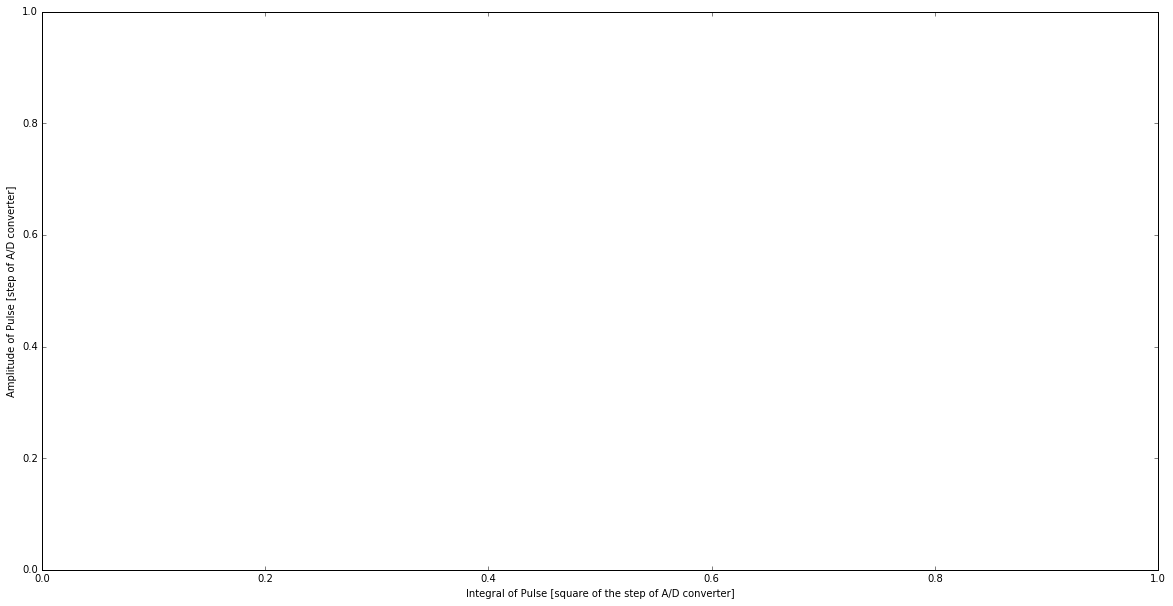

In [34]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if (maximum < 256):
            #if (maximum < 254):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for f in glob.iglob("./dataB/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

for f in glob.iglob("./dataB/**/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass


    
plt.figure(figsize=(20,10))



ble = plt.hist2d(y, x, bins=(500,129), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#cb = plt.colorbar()
#cb.set_label('Count')

#plt.plot([0,10000],[100,100],ls='-',c='r',marker='o')
#plt.plot([0,100000],[100,1000],c='r',lw=3,zorder=99)
#plt.xlim(60000,160000)
#plt.ylim(50,150)
plt.show()


   ./data/ascend/data07_1511961969.h5 CAPTURING: 336.54


<Figure size 1440x720 with 0 Axes>

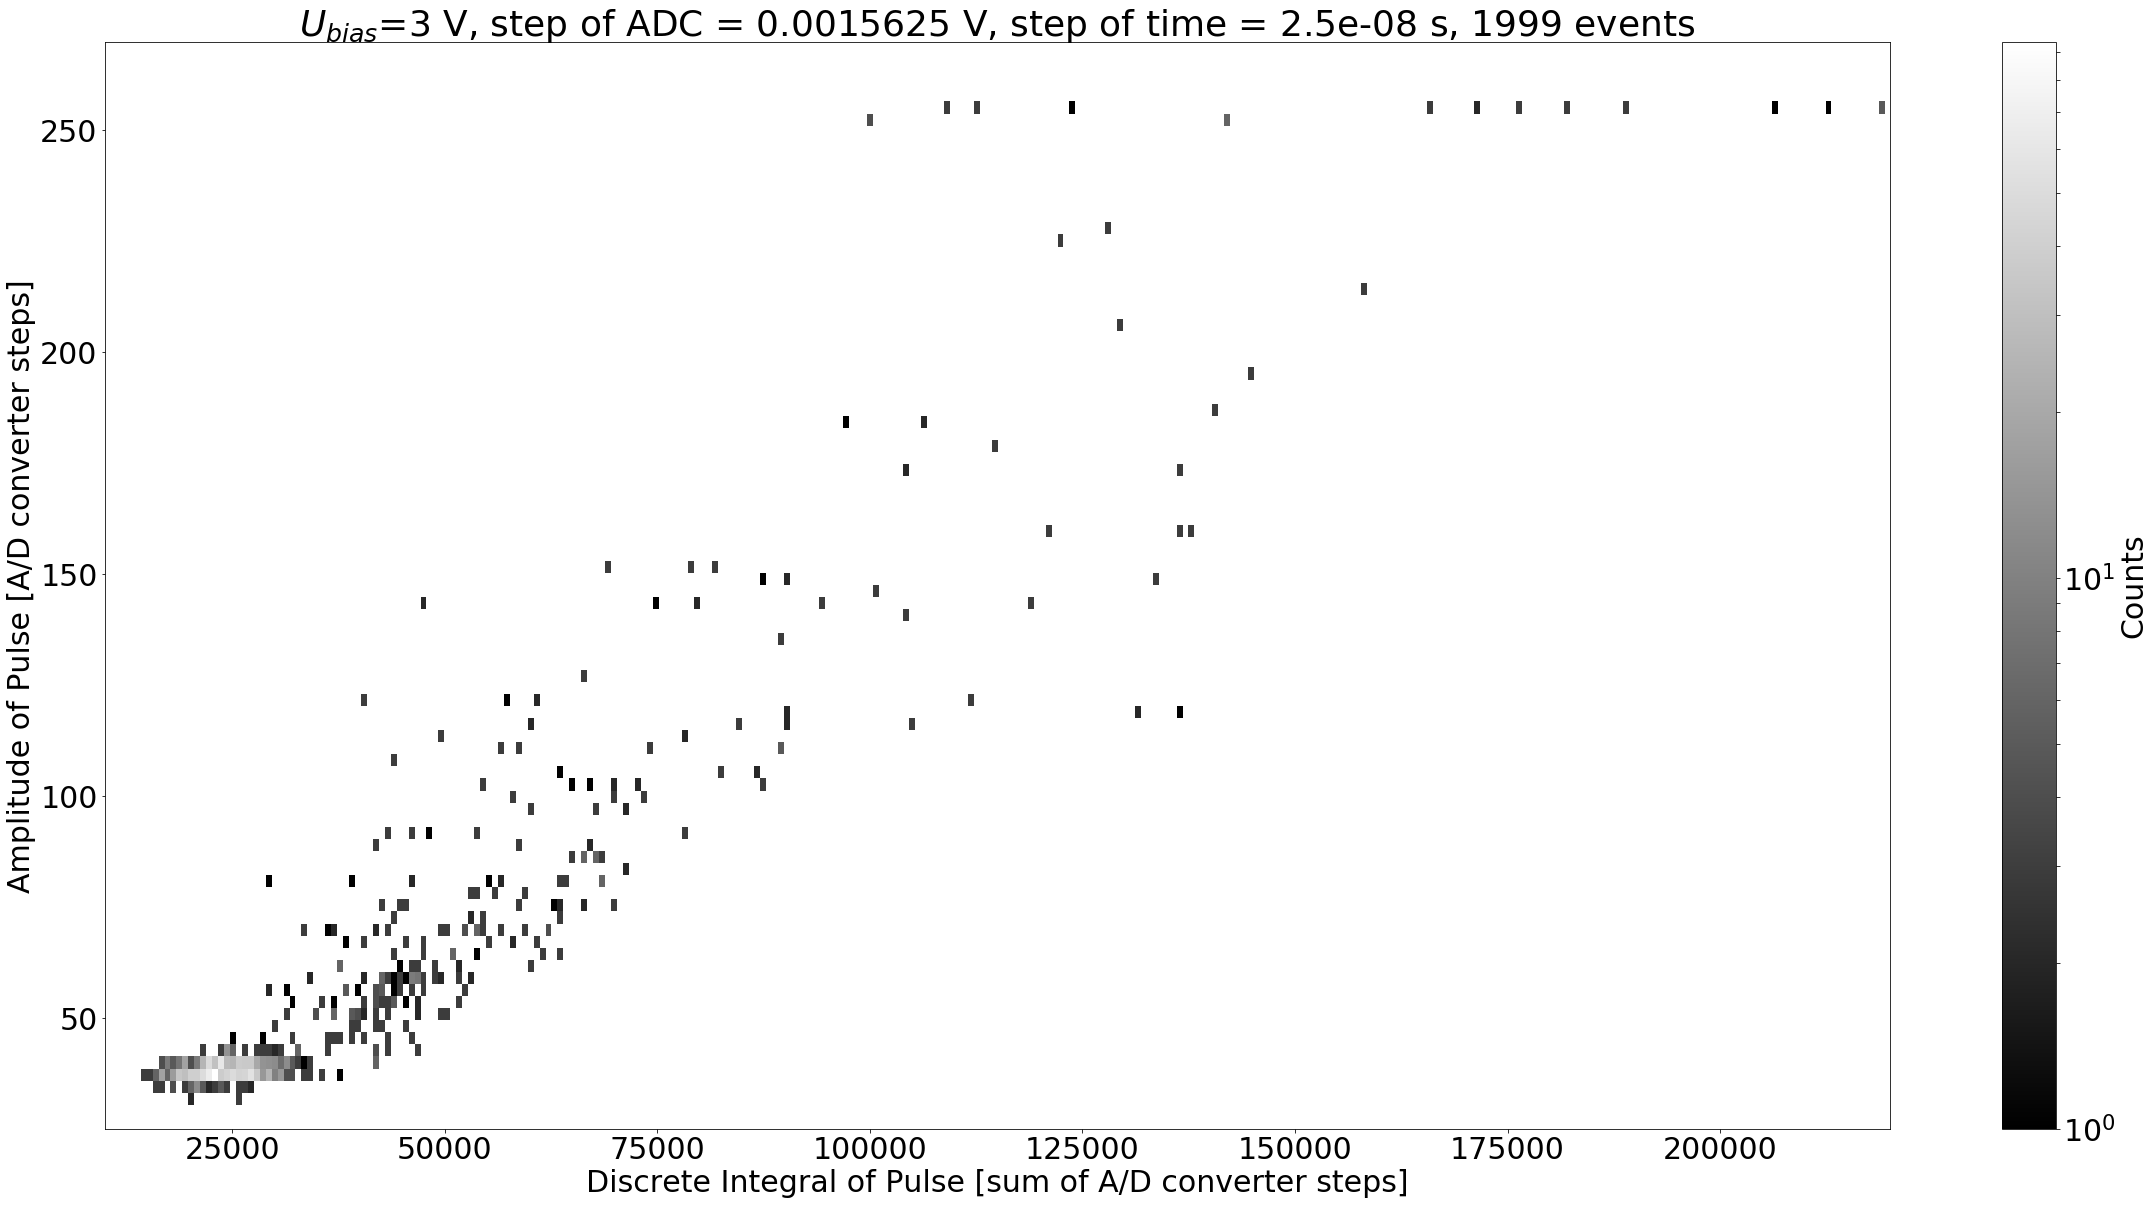

In [47]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for d in ['ascend']:
    for f in glob.iglob('./data/'+ d + '/data07*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 220000], [25,270]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')
plt.title(r'$U_{bias}$=3 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')

   ./data/HIMAC1/data02.h5 CAPTURING: None
   ./data/HIMAC1/data01.h5 CAPTURING: None
   ./data/HIMAC1/data03.h5 CAPTURING: None
   ./data/HIMAC2/data02.h5 CAPTURING: None
   ./data/HIMAC2/data01.h5 CAPTURING: None
   ./data/HIMAC2/data03.h5 CAPTURING: None


<Figure size 1440x720 with 0 Axes>

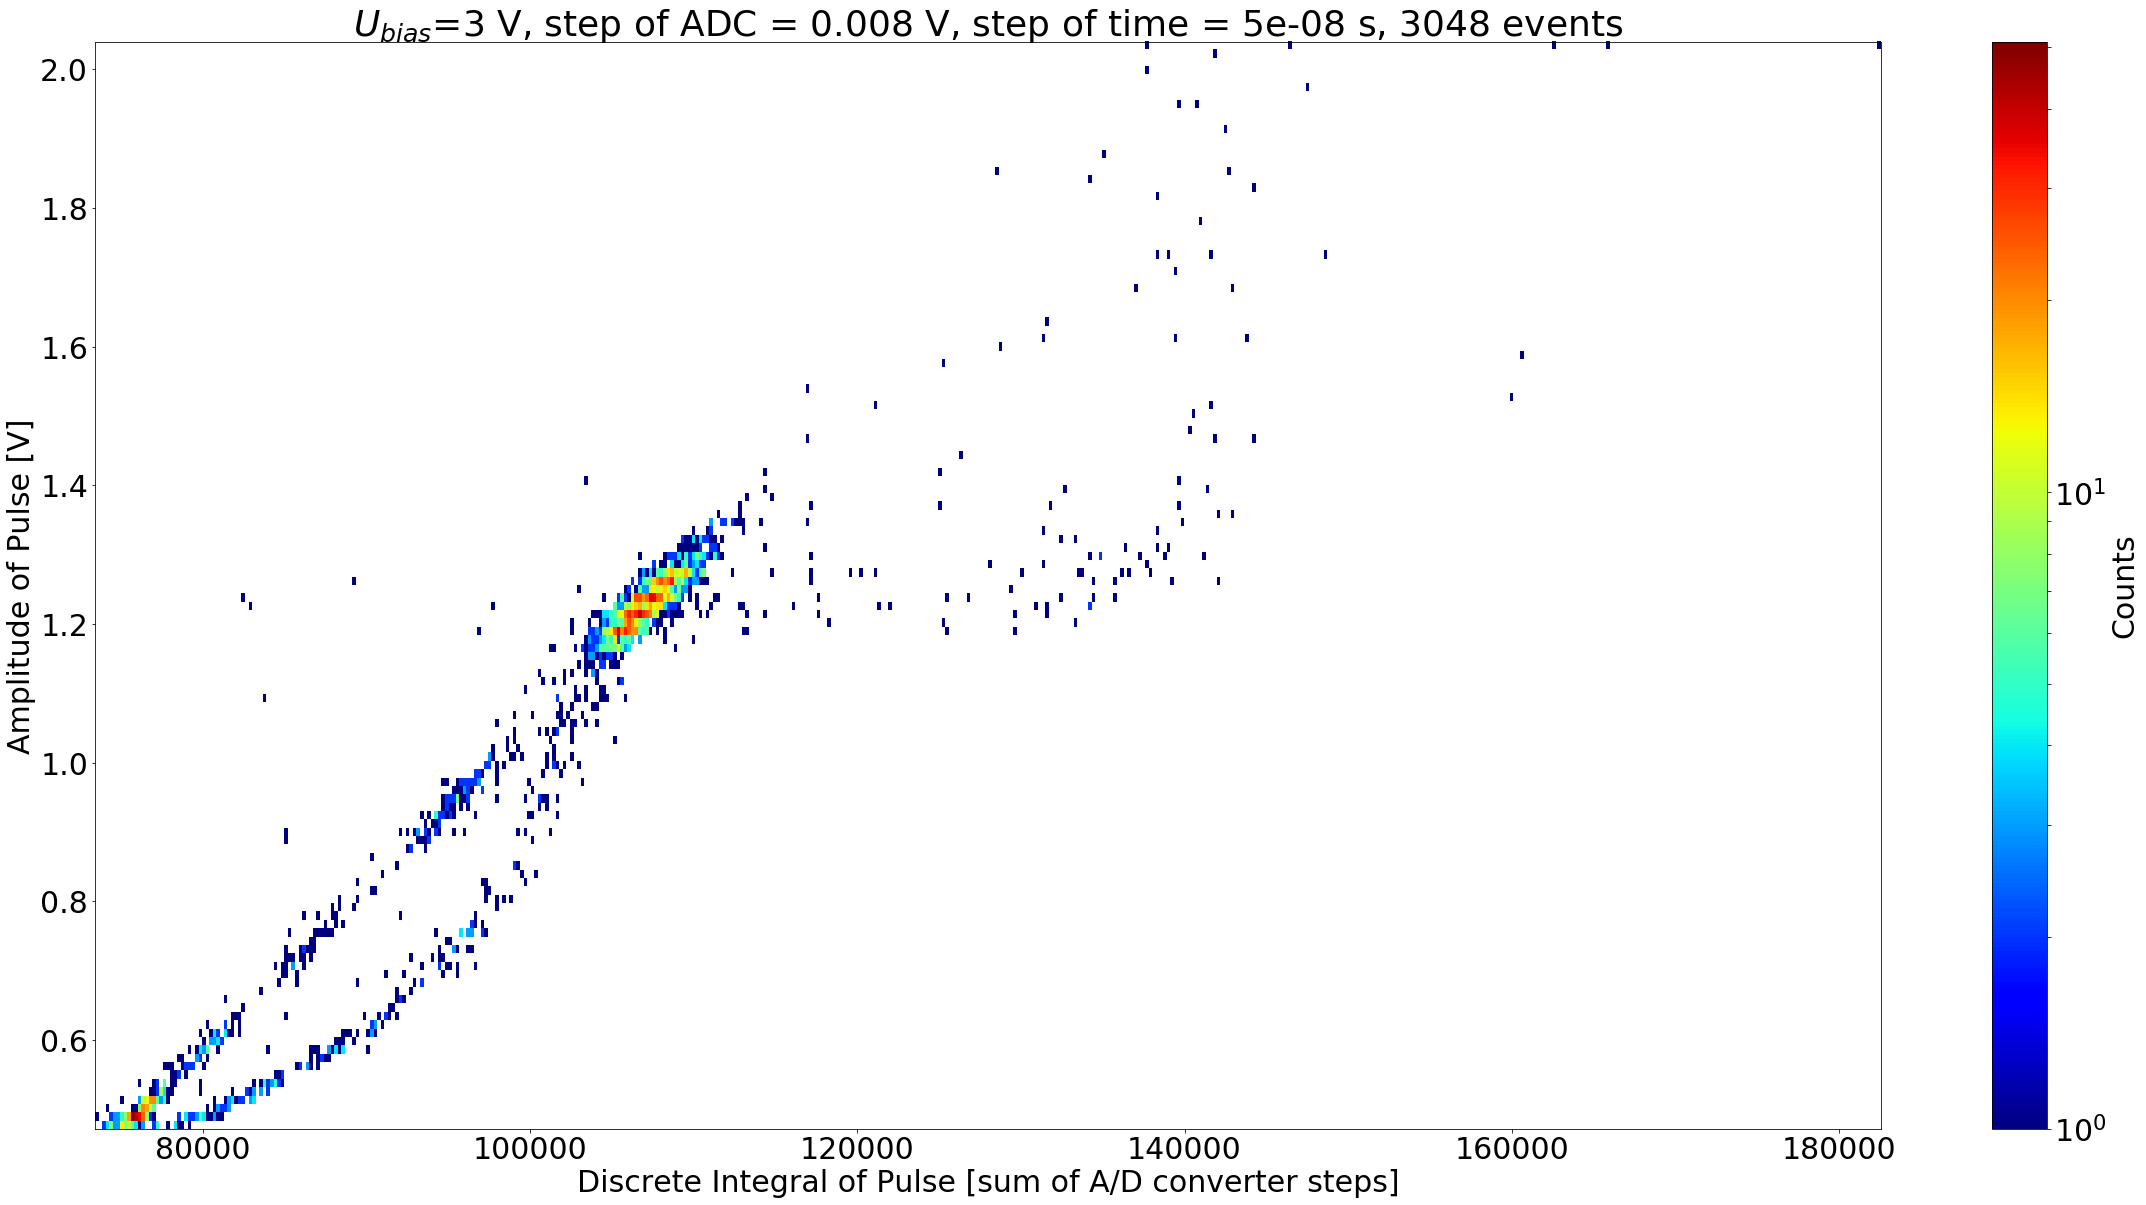

In [70]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum*0.008)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for d in ['HIMAC1','HIMAC2']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

#ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 200000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ble = plt.hist2d(y, x, bins=(500,130), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,130), range= [[10000, 250000], [30,270]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [V]')
plt.title(r'$U_{bias}$=3 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')

## Oscilloscope Setup
* 64 mV/div
* 2 us/div
* trig. level 21 mV
* time offset 12 us

Pu-239 atenuated 25 mm of air 


   ./data/cerf2018/data00_1528497279-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 508  XORIGIN: -1.999999e-06  YORIGIN: -89.0  TRIG: 0.020594
CAPTURING: 1800.57
   ./data/cerf2018/data01_1528499136-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 508  XORIGIN: -1.999999e-06  YORIGIN: -89.0  TRIG: 0.020594
CAPTURING: 677.34
   ./data/data02_1574453837-CHAN1.h5    ./data/data01_1574453489-CHAN1.h5 XINC: 2e-08  YINC: 0.002  FRAMES: 1999  XORIGIN: -1.999999e-06  YORIGIN: -89.0  TRIG: 0.020975
CAPTURING: 131.23


<Figure size 1440x720 with 0 Axes>

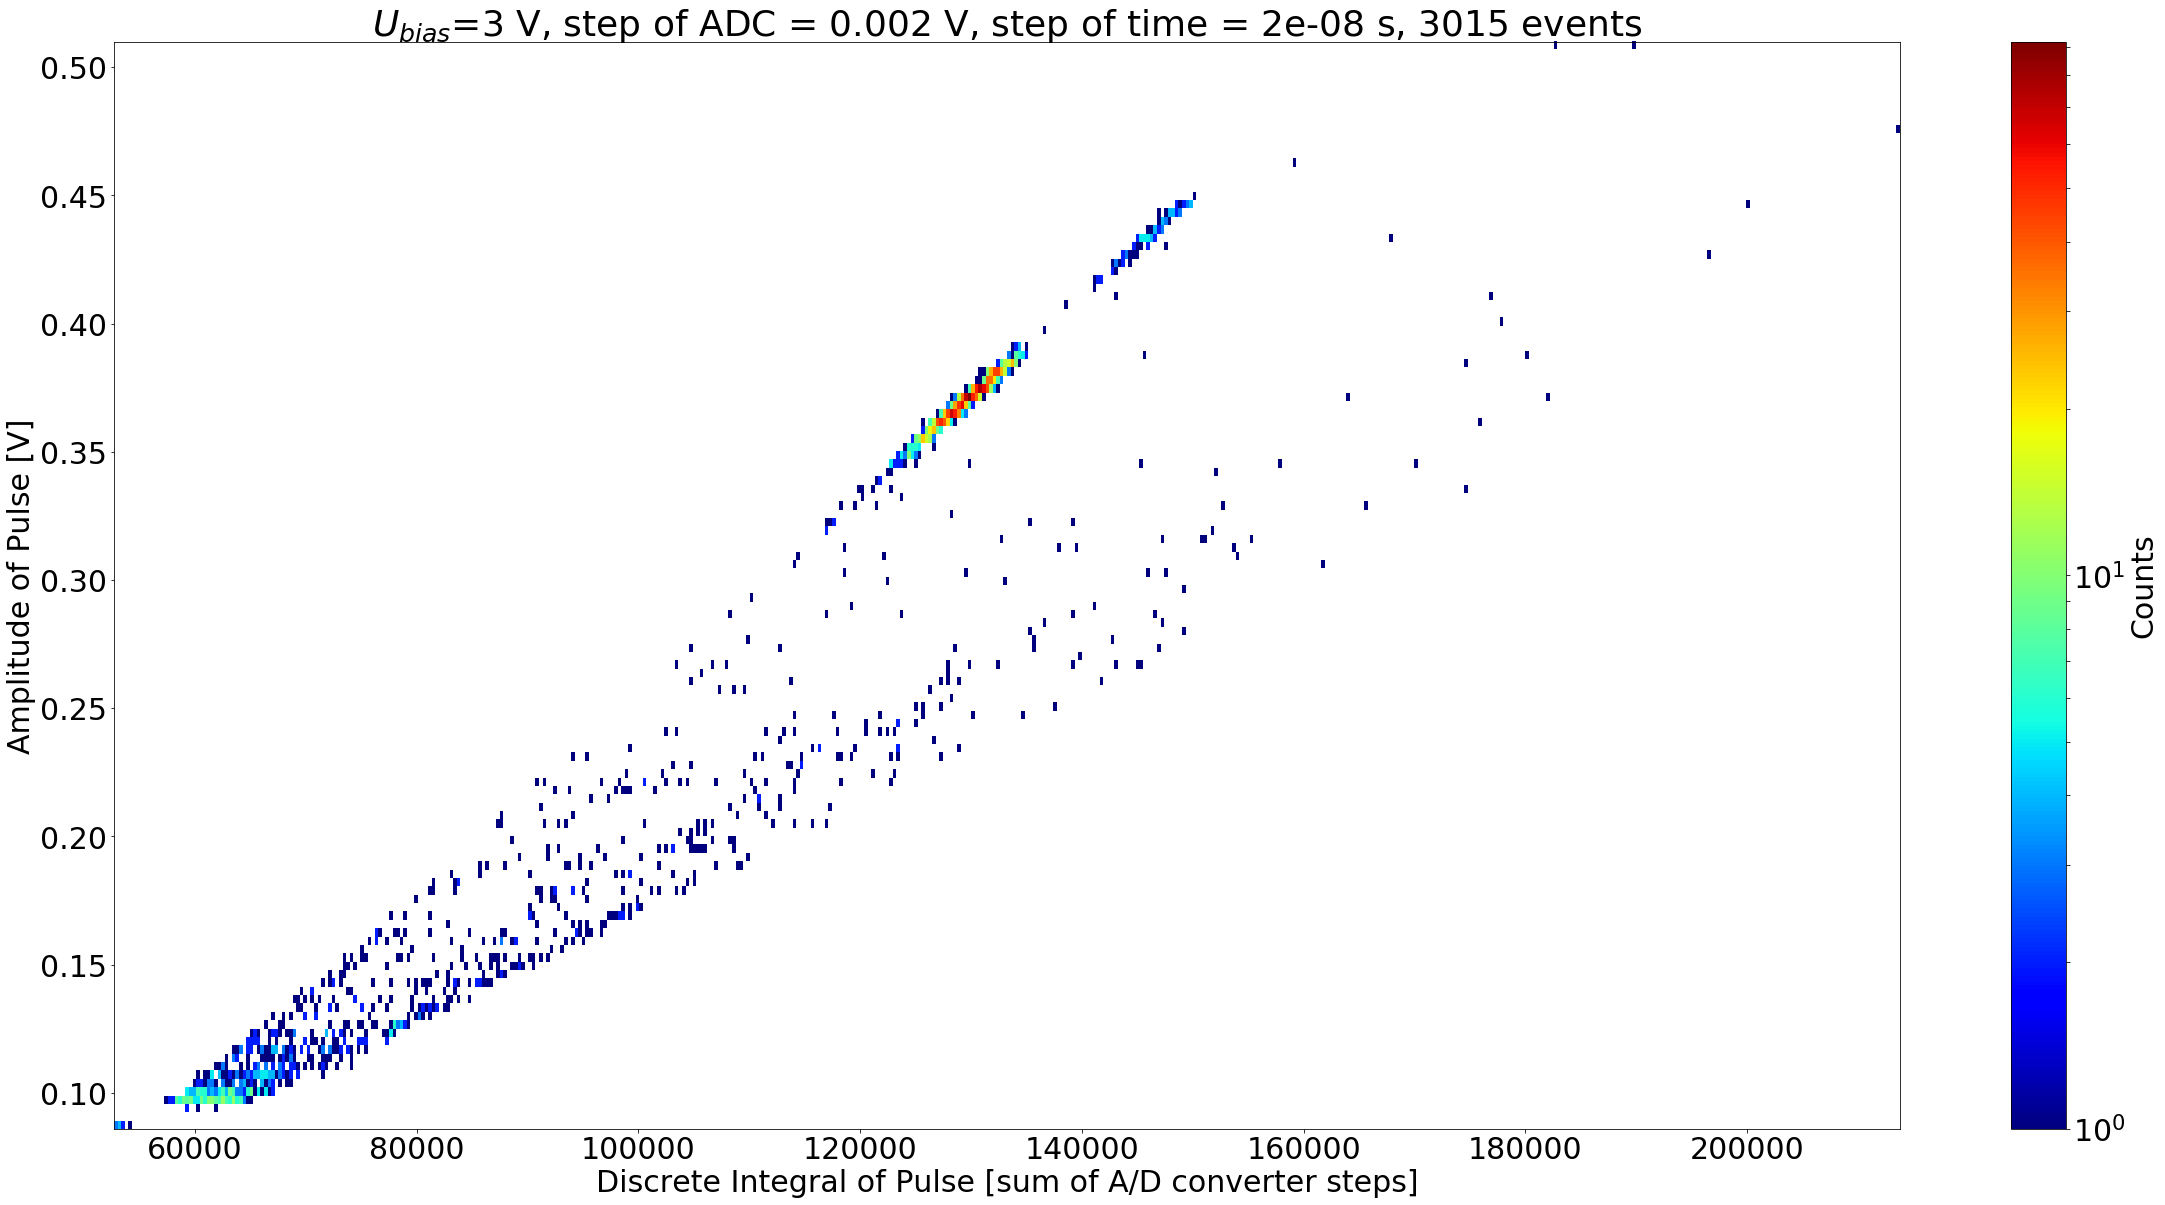

In [89]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum*0.002)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for d in ['cerf2018']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass

for f in glob.iglob('./data/data*.h5'): # generator, search immediate subdirectories 
    print '  ', f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData(0)
    except:        
        pass

matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,20))
plt.tight_layout()

#ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 200000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ble = plt.hist2d(y, x, bins=(500,130), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,130), range= [[10000, 250000], [30,270]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [V]')
plt.title(r'$U_{bias}$=3 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s, '+ str(all_frames) + ' events')
cb = plt.colorbar()
cb.set_label('Counts')

   ./data/cerf2018/data45_1528510341-CHAN1.h5 CAPTURING: 476.03
   ./data/cerf2018/data52_1528511883-CHAN1.h5 CAPTURING: 114.75
   ./data/cerf2018/data178_1528540597-CHAN1.h5 CAPTURING: 513.36
   ./data/cerf2018/data90_1528521472-CHAN1.h5 CAPTURING: 101.52
   ./data/cerf2018/data88_1528520807-CHAN1.h5 CAPTURING: 228.8
   ./data/cerf2018/data08_1528501816-CHAN1.h5 CAPTURING: 102.65
   ./data/cerf2018/data171_1528537873-CHAN1.h5 CAPTURING: 247.74
   ./data/cerf2018/data170_1528537730-CHAN1.h5 CAPTURING: 86.16
   ./data/cerf2018/data48_1528511233-CHAN1.h5 CAPTURING: 103.03
   ./data/cerf2018/data07_1528501644-CHAN1.h5 CAPTURING: 115.6
   ./data/cerf2018/data127_1528528860-CHAN1.h5 CAPTURING: 187.68
   ./data/cerf2018/data34_1528508525-CHAN1.h5 CAPTURING: 103.27
   ./data/cerf2018/data197_1528549465-CHAN1.h5 CAPTURING: 123.86
   ./data/cerf2018/data131_1528529908-CHAN1.h5 CAPTURING: 217.47
   ./data/cerf2018/data91_1528521630-CHAN1.h5 CAPTURING: 102.21
   ./data/cerf2018/data00_1528497279-

   ./data/cerf2018/data103_1528523543-CHAN1.h5 CAPTURING: 102.46
   ./data/cerf2018/data151_1528534709-CHAN1.h5 CAPTURING: 84.94
   ./data/cerf2018/data97_1528522581-CHAN1.h5 CAPTURING: 101.5
   ./data/cerf2018/data182_1528542838-CHAN1.h5 CAPTURING: 314.88
   ./data/cerf2018/data77_1528518661-CHAN1.h5 CAPTURING: 464.36
   ./data/cerf2018/data130_1528529650-CHAN1.h5 CAPTURING: 201.75
   ./data/cerf2018/data135_1528531348-CHAN1.h5 CAPTURING: 205.12
   ./data/cerf2018/data50_1528511551-CHAN1.h5 CAPTURING: 114.09
   ./data/cerf2018/data173_1528538361-CHAN1.h5 CAPTURING: 255.2
   ./data/cerf2018/data20_1528505111-CHAN1.h5 CAPTURING: 118.14
   ./data/cerf2018/data01_1528499136-CHAN1.h5 CAPTURING: 677.34
   ./data/cerf2018/data42_1528509851-CHAN1.h5 CAPTURING: 115.7
   ./data/cerf2018/data154_1528535122-CHAN1.h5 CAPTURING: 74.72
   ./data/cerf2018/data66_1528515813-CHAN1.h5 CAPTURING: 113.71
   ./data/cerf2018/data95_1528522264-CHAN1.h5 CAPTURING: 100.68
   ./data/cerf2018/data65_1528515655-C

Text(0.5,1,'$U_{bias}$=3 V, step of ADC = 0.002 V, step of time = 2e-08 s')

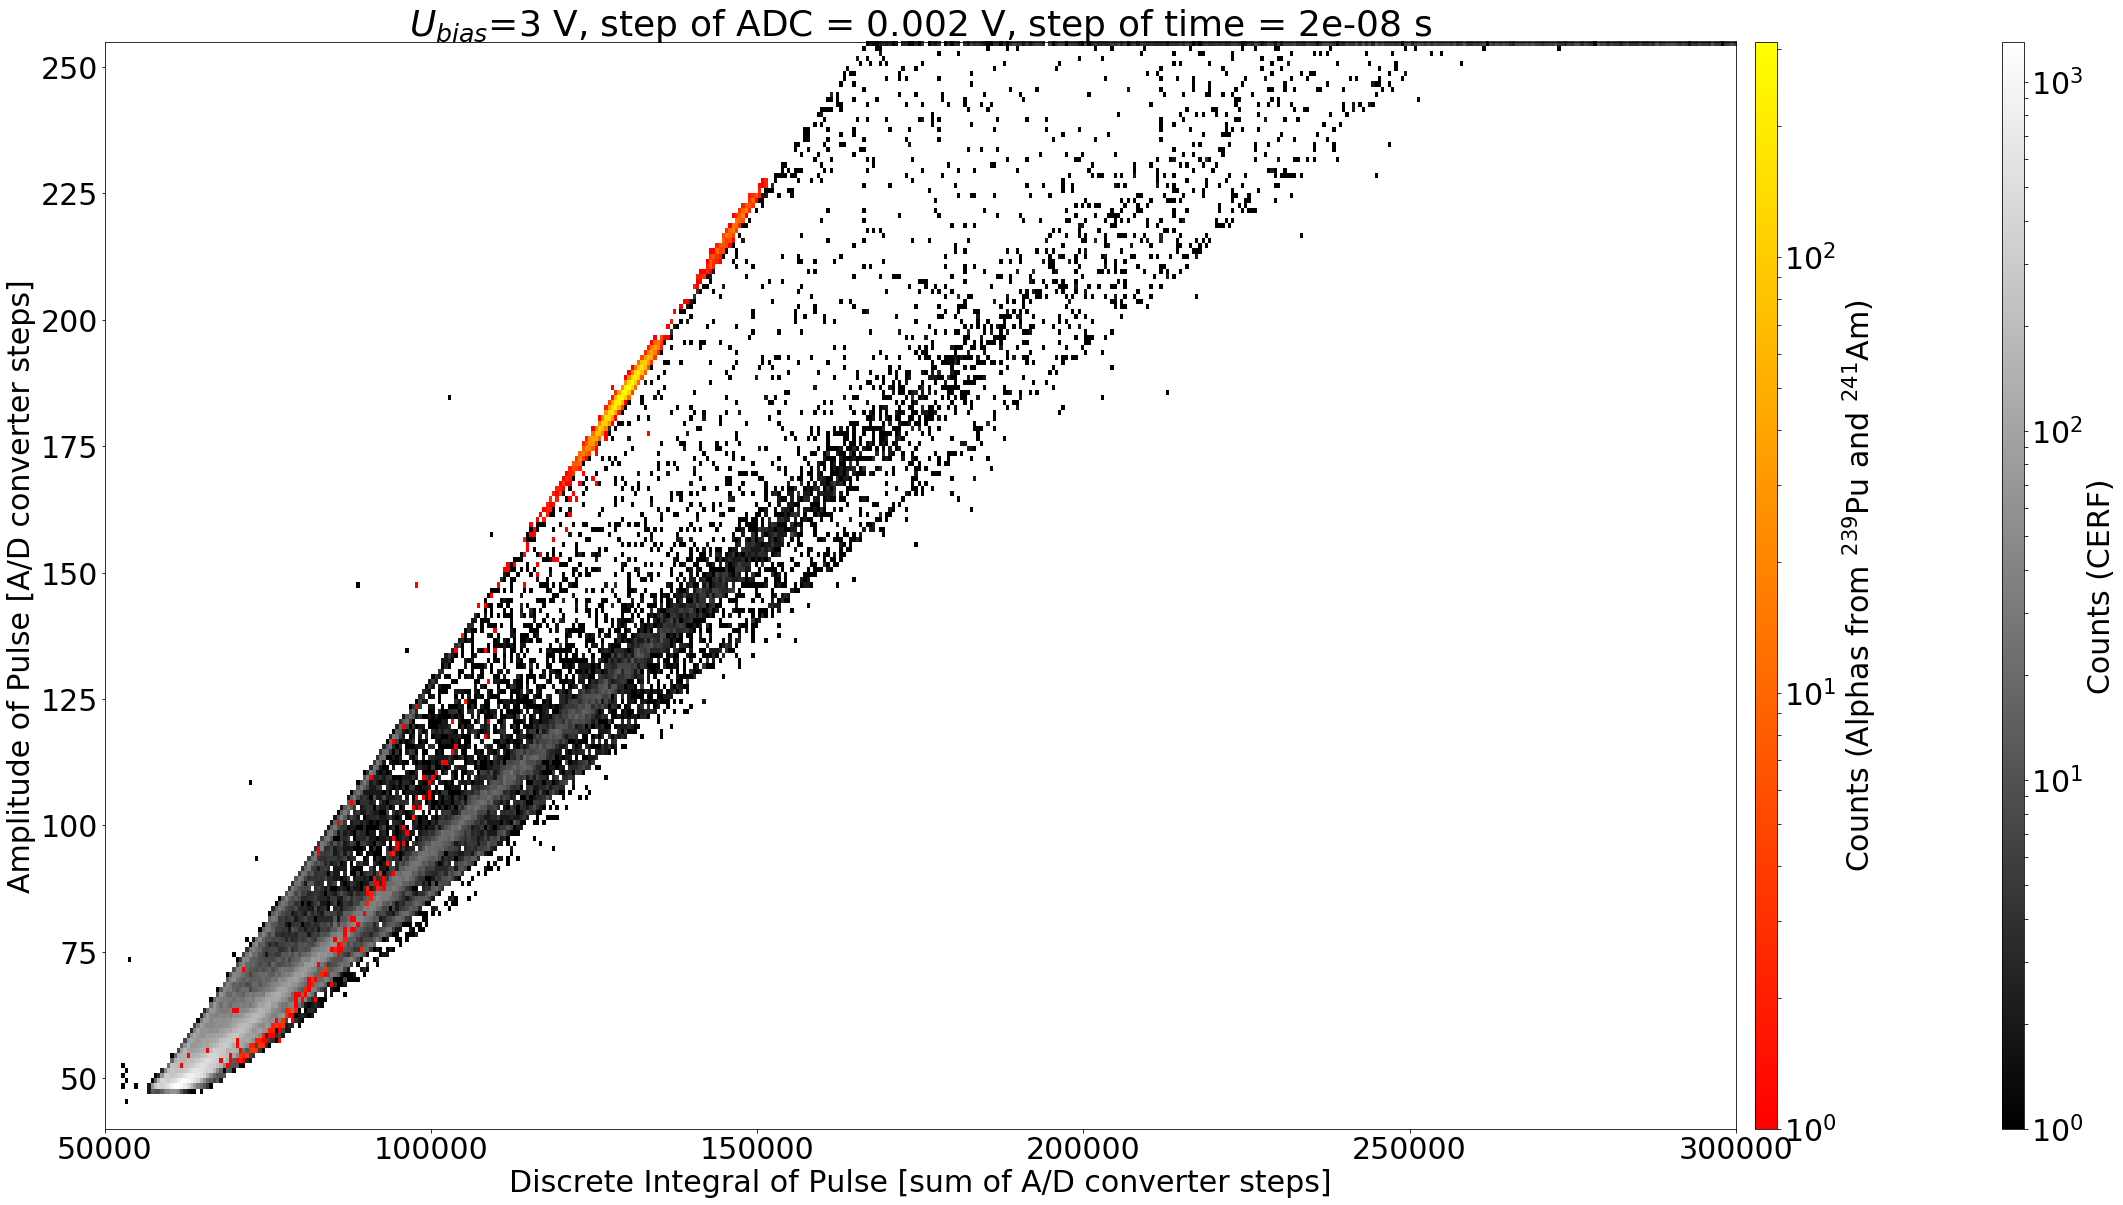

In [101]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            np_data = np.array(data)
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum)
                y.append(suma)
                z.append((maximum))

plt.figure(figsize=(40,20))             
matplotlib.rcParams.update({'font.size': 30})
plt.tight_layout()

for d in ['cerf2018']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(44)
        except:        
            pass
        #break
        
ble = plt.hist2d(y, x, bins=(500,215), range= [[50000, 280000], [40,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray)
plt.colorbar(label=r'Counts (CERF)', orientation='vertical', aspect=50, pad=-0.02)
x = []
y = []
z = []

for d in ['241-Am-cerf']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print '  ', f,
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(40)
        except:        
            pass

ble = plt.hist2d(y, x, bins=(500,215), range= [[50000, 280000], [40,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.autumn)
plt.colorbar(label=r'Counts (Alphas from $^{239}$Pu and $^{241}$Am)', orientation='vertical', aspect=50, pad=0.01)

plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')

#plt.text(150,75000,'2')
#plt.text(170,175000,'3')
plt.title(r'$U_{bias}$=3 V, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s')


   ./data/60-Co/data02_1572602437-CHAN1.h5
CAPTURING: 7.74
   ./data/241-Am/data01_Am.h5
CAPTURING: 534.04
   ./data/241-Am/data02_Am.h5
CAPTURING: 541.98
   ./data/r0/data01_1575463750-CHAN1.h5
CAPTURING: 21.86
   ./data/r0/data02_1575463861-CHAN1.h5
CAPTURING: 23.32
   ./data/r0/data04_1575464084-CHAN1.h5
CAPTURING: 22.38
   ./data/r0/data05_1575464195-CHAN1.h5
CAPTURING: 20.91
   ./data/r0/data03_1575463973-CHAN1.h5
CAPTURING: 21.27
   ./data/22M/data06_1575474939-CHAN1.h5
CAPTURING: 20.1
   ./data/22M/data03_1575474614-CHAN1.h5
CAPTURING: 18.56
   ./data/22M/data05_1575474831-CHAN1.h5
CAPTURING: 19.48
   ./data/22M/data01_1575474399-CHAN1.h5
CAPTURING: 17.95
   ./data/22M/data02_1575474506-CHAN1.h5
CAPTURING: 18.87
   ./data/22M/data04_1575474722-CHAN1.h5
CAPTURING: 19.34
   ./data/12M/data03_1575487594-CHAN1.h5
CAPTURING: 39.52
   ./data/12M/data04_1575487724-CHAN1.h5
CAPTURING: 36.97
   ./data/12M/data05_1575487850-CHAN1.h5
CAPTURING: 36.92
   ./data/12M/data02_1575487470-CHAN1.h

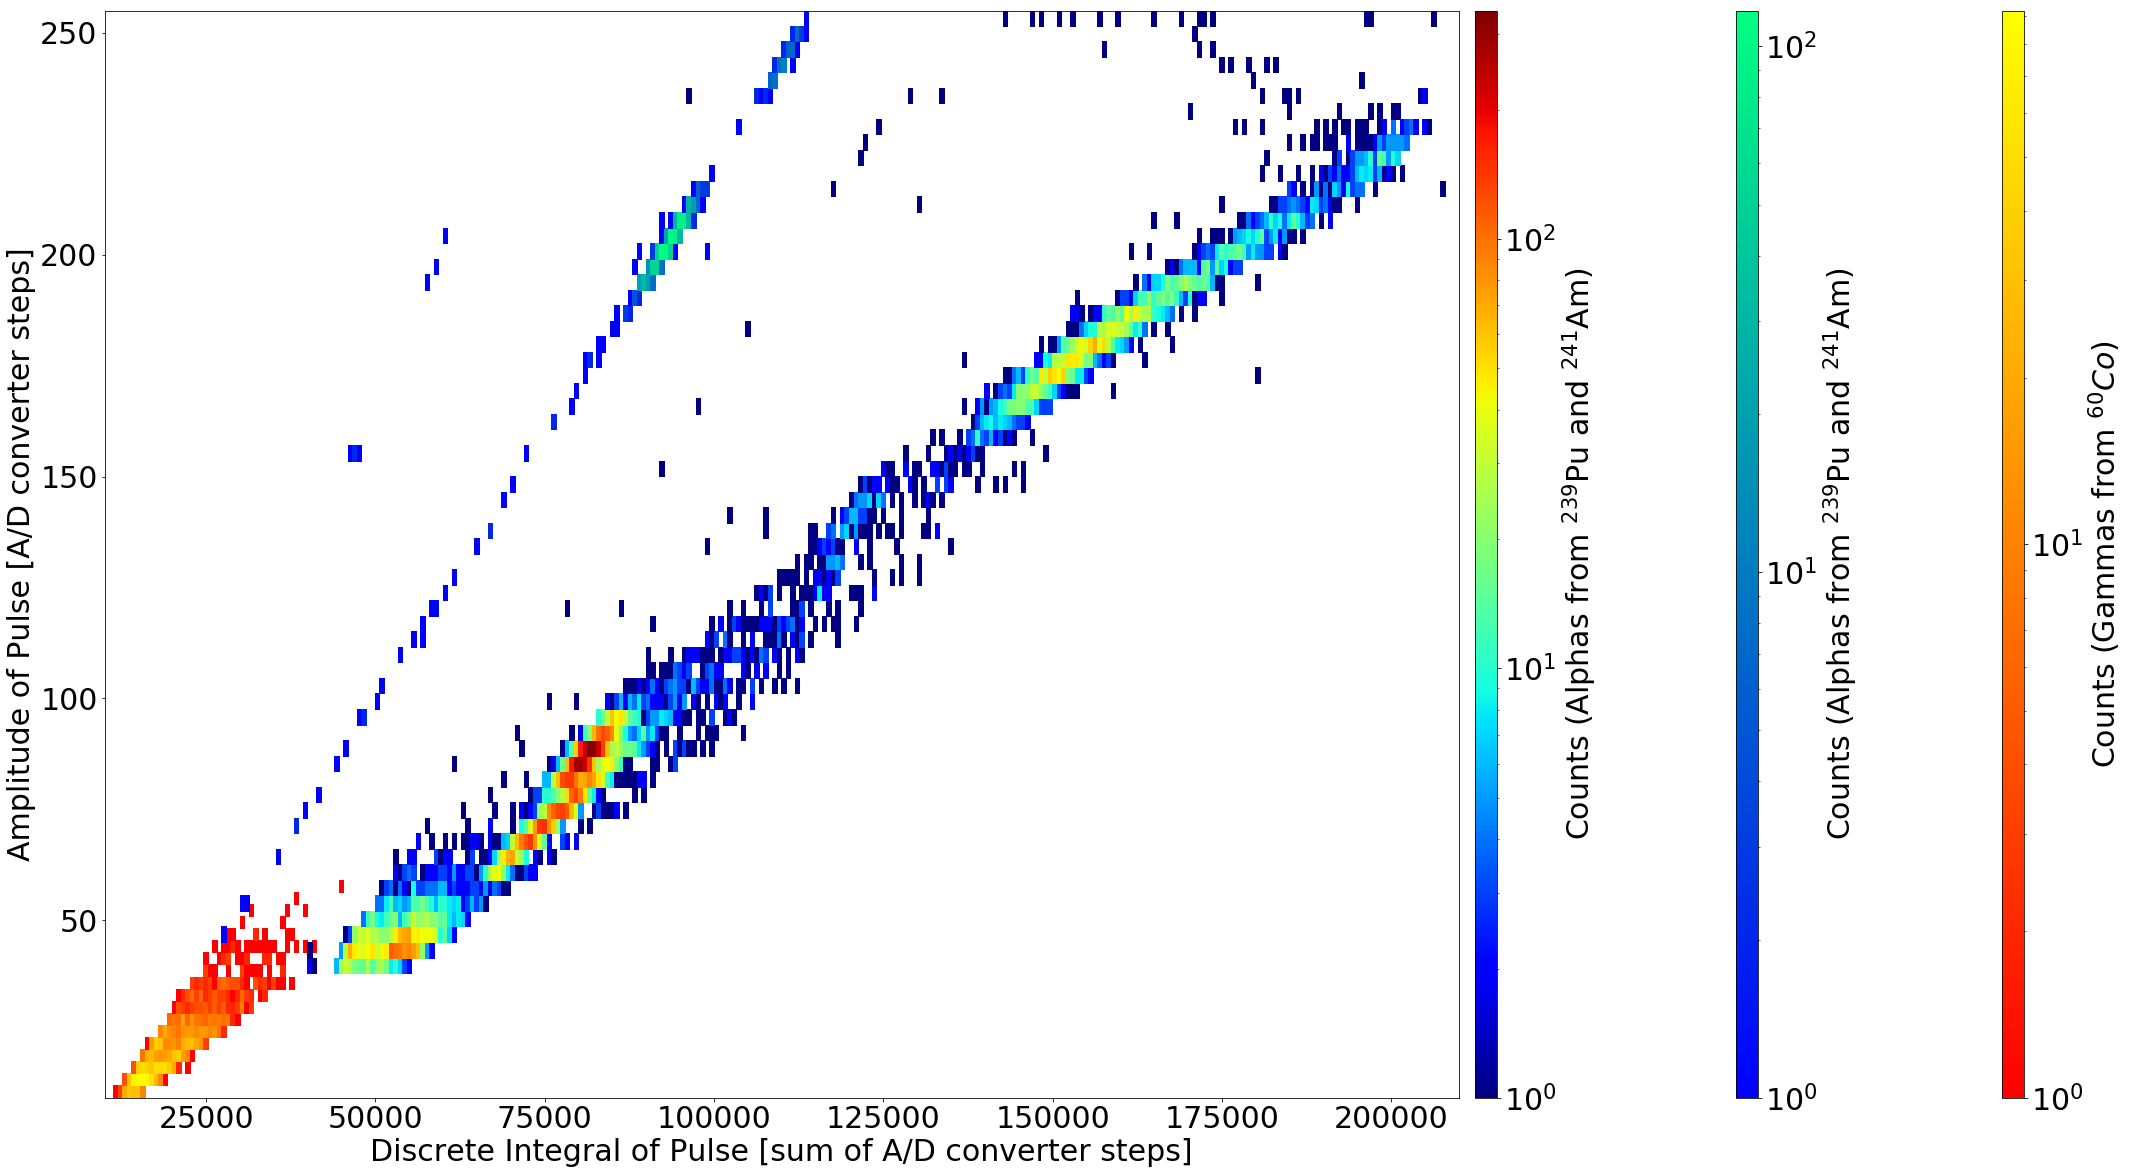

In [16]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print ('CAPTURING:', capturing)         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            np_data = np.array(data)
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum)
                y.append(suma)
                z.append((maximum))

plt.figure(figsize=(40,20))             
matplotlib.rcParams.update({'font.size': 30})
plt.tight_layout()

'''
for d in ['FL390']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print ('  ', f,)
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(44)
        except:        
            pass
        #break
        
ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 210000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray)
plt.colorbar(label=r'Counts (REFLECT experiment)', orientation='vertical', aspect=50, pad=-0.02)
'''
x = []
y = []
z = []

for d in ['60-Co']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print ('  ', f,)
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(0)
        except:        
            pass


ble = plt.hist2d(y, x, bins=(300,90), range= [[10000, 210000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.autumn)
plt.colorbar(label='Counts (Gammas from $^{60}Co)$', orientation='vertical', aspect=50, pad=-0.01)
x = []
y = []
z = []

for d in ['241-Am']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print ('  ', f,)
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(40)
        except:        
            pass

ble = plt.hist2d(y, x, bins=(300,70), range= [[10000, 210000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.winter)
plt.colorbar(label=r'Counts (Alphas from $^{239}$Pu and $^{241}$Am)', orientation='vertical', aspect=50, pad=0.01)

plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')

x = []
y = []
z = []

for d in ['r0','22M','12M']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print ('  ', f,)
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(40)
        except:        
            pass

ble = plt.hist2d(y, x, bins=(300,70), range= [[10000, 210000], [10,255]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.colorbar(label=r'Counts (Alphas from $^{239}$Pu and $^{241}$Am)', orientation='vertical', aspect=50, pad=0.01)


   ./data/bpw34_33V/data3.h5
CAPTURING: None
   ./data/bpw34_33V/data6.h5
CAPTURING: None
   ./data/bpw34_33V/data7.h5
CAPTURING: None
   ./data/bpw34_33V/data4.h5
CAPTURING: None
   ./data/bpw34_33V/data2.h5
CAPTURING: None
   ./data/bpw34_33V/data5.h5
CAPTURING: None
   ./data/bpw34_33V/data1.h5
CAPTURING: None
   ./data/bpw34_0V/data3.h5
CAPTURING: None
   ./data/bpw34_0V/data4.h5
CAPTURING: None
   ./data/bpw34_0V/data2.h5
CAPTURING: None
   ./data/bpw34_0V/data5.h5
CAPTURING: None


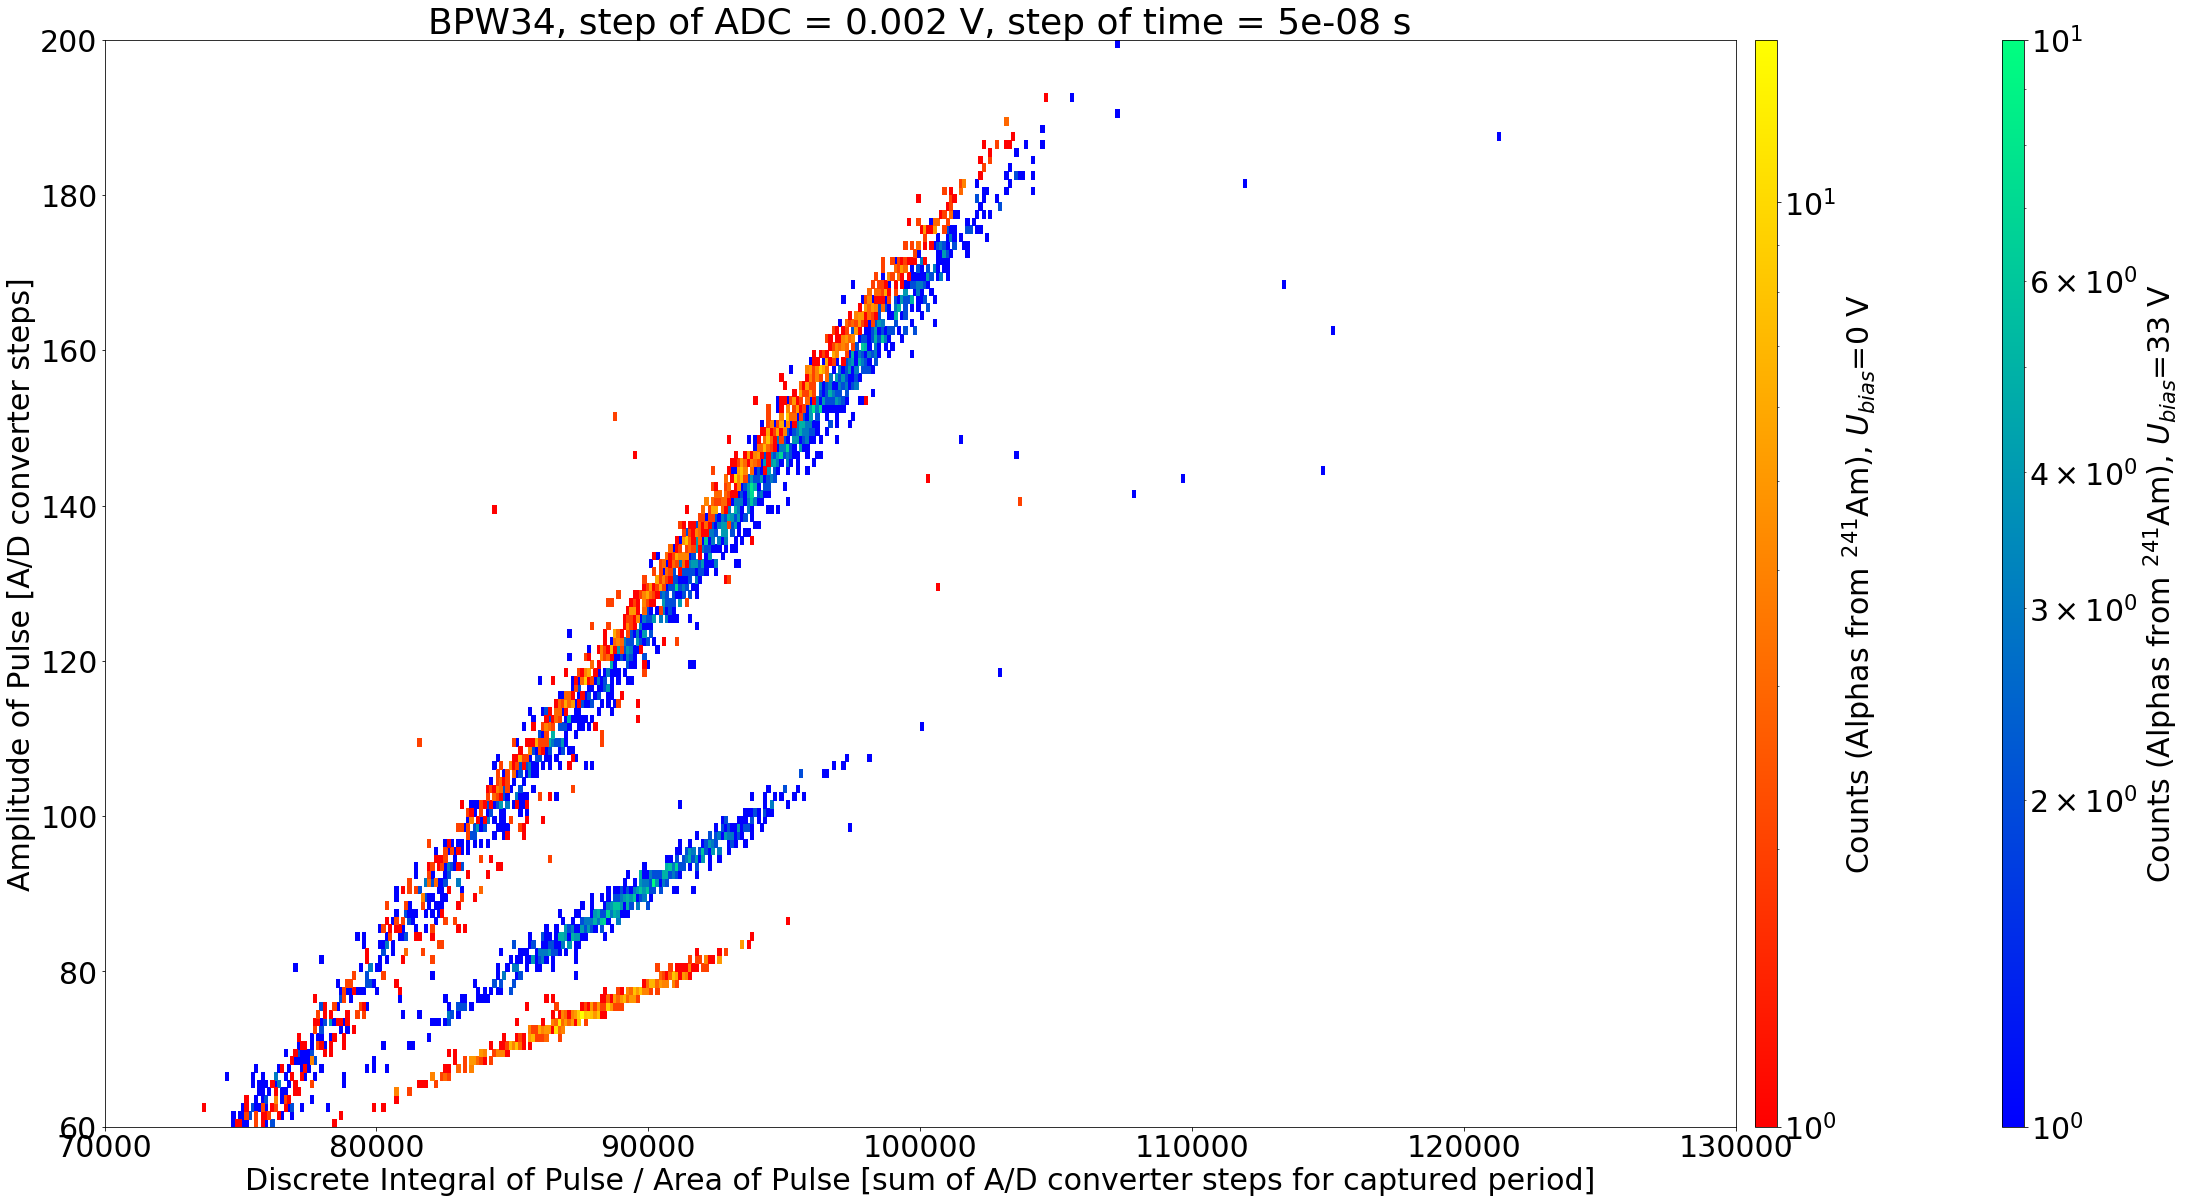

In [48]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0


def ProcessData(noise):
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        #print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print ('CAPTURING:', capturing)         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            np_data = np.array(data)
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if ((maximum < 256)and(maximum > noise)):
                x.append(maximum)
                y.append(suma)
                z.append((maximum))

plt.figure(figsize=(40,20))             
matplotlib.rcParams.update({'font.size': 30})
plt.tight_layout()

for d in ['bpw34_33V']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print ('  ', f,)
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(44)
        except:        
            pass
        #break
        
ble = plt.hist2d(y, x, bins=(500,200-60), range= [[70000, 130000], [60,200]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.winter)
plt.colorbar(label=r'Counts (Alphas from $^{241}$Am), $U_{bias}$=33 V', orientation='vertical', aspect=50, pad=-0.02)
x = []
y = []
z = []

for d in ['bpw34_0V']:
    for f in glob.iglob('./data/'+ d + '/data*.h5'): # generator, search immediate subdirectories 
        print ('  ', f,)
        try:
            with h5py.File(f,'r') as hf:
                    ProcessData(40)
        except:        
            pass

ble = plt.hist2d(y, x, bins=(500,200-60), range= [[70000, 130000], [60,200]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.autumn)
plt.colorbar(label=r'Counts (Alphas from $^{241}$Am), $U_{bias}$=0 V', orientation='vertical', aspect=50, pad=0.01)

plt.xlabel('Discrete Integral of Pulse / Area of Pulse [sum of A/D converter steps for captured period]')
plt.ylabel('Amplitude of Pulse [A/D converter steps]')

#plt.text(150,75000,'2')
#plt.text(170,175000,'3')
plt.title(r'BPW34, step of ADC = ' + str(yinc) + ' V, step of time = ' + str(xinc) + ' s')

None

./data/himac_bias/170603-040616-Si490-6-V-no-binary/data02.h5./data/himac_bias/170603-040616-Si490-6-V-no-binary/data01.h5./data/himac_bias/170603-040616-Si490-6-V-no-binary/data03.h5./data/himac_bias/170603-041441-Si490-3-V-no-binary/data02.h5./data/himac_bias/170603-041441-Si490-3-V-no-binary/data01.h5./data/himac_bias/170603-041441-Si490-3-V-no-binary/data03.h5./data/himac_bias/170603-035141-Si490-1.5-V-no-binary/data02.h5./data/himac_bias/170603-035141-Si490-1.5-V-no-binary/data01.h5./data/himac_bias/170603-035141-Si490-1.5-V-no-binary/data03.h5

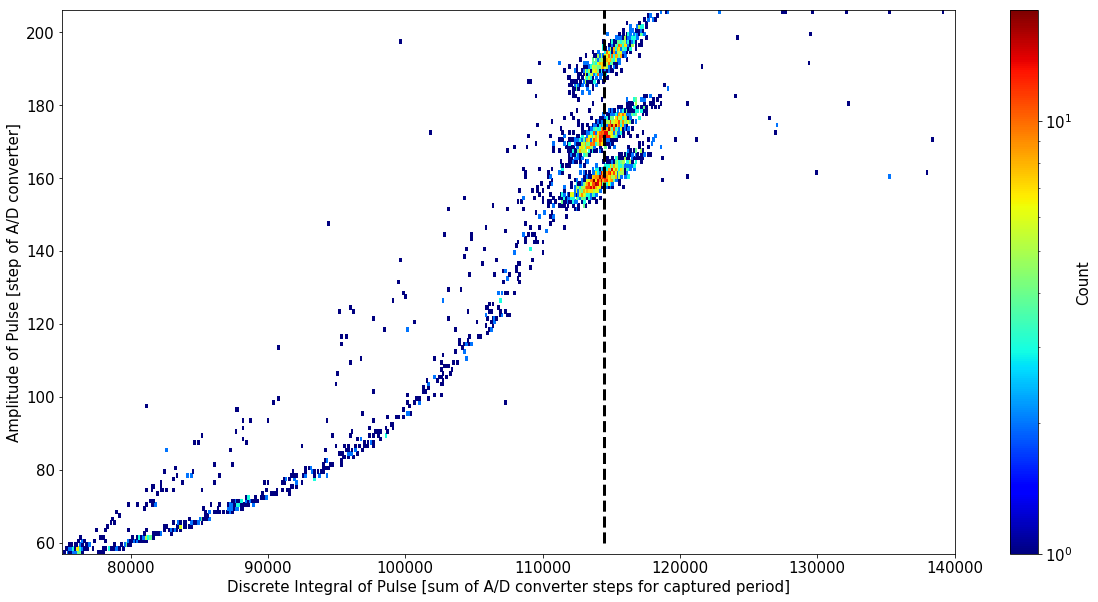

In [104]:
x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames

        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if (maximum < 256):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     

for f in glob.iglob("./data/himac_bias/**/data*.h5"): # generator, search immediate subdirectories 
    print (f, end='')
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:  
        pass


    
plt.figure(figsize=(20,10))
matplotlib.rcParams.update({'font.size': 15})
plt.tight_layout()


ble = plt.hist2d(y, x, bins=(500,206-57), range= [[75000, 140000], [57,206]], norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
area = 114500
plt.plot([area,area], [60,210], lw=3, linestyle='dashed', c='black')

plt.xlabel('Discrete Integral of Pulse [sum of A/D converter steps for captured period]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()
cb.set_label('Count')


None

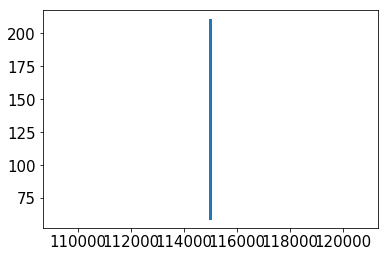

In [96]:
plt.plot([115000,115000], [60,210],lw=3, linestyle='-')
